In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import plotly.offline as pyo
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_columns',130)

In [58]:
df = pd.read_excel(r'D:\mszcz\Documents\dane_spss.xlsx')


In [173]:
df.head()

,skojarzenie_1,skojarzenie_2,skojarzenie_3,preferencja_Pilos,preferencja_Muuler,preferencja_Piatnica,preferencja_Valio,preferencja_Ehremann,preferencja_Laciate,preferencja_GoActive,preferencja_YoPro,preferencja_Mlekowita,rozpoznawalnosc_Pilos,rozpoznawalnosc_Muller,rozpoznawalnosc_Piatnica,rozpoznawalnosc_Valio,rozpoznawalnosc_Ehrmann,rozpoznawalnosc_Laciate,rozpoznawalnosc_GoActive,rozpoznawalnosc_YoPro,rozpoznawalnosc_Mlekovita,swiadomosc_Pilos,swiadomosc_Muller,swiadomosc_Piatnica,swiadomosc_Valio,swiadomosc_Ehrmann,swiadomosc_Laciate,swiadomosc_GoActive,swiadomosc_YoPro,swiadomosc_Mlekovita,identyfikacja_Pilos,identyfikacja_Muller,identyfikacja_Piatnica,identyfikacja_Valio,identyfikacja_Ehrmann,identyfikacja_Laciate,identyfikacja_GoActive,identyfikacja_YoPro,identyfikacja_Mlekovita,czestotliwosc_wyboru_Pilos,czestotliwosc_wyboru_Muller,czestotliwosc_wyboru_Piatnica,czestotliwosc_wyboru_Valio,czestotliwosc_wyboru_Ehrmann,czestotliwosc_wyboru_Laciate,czestotliwosc_wyboru_GoActive,czestotliwosc_wyboru_YoPro,czestotliwosc_wyboru_Mlekovita,polecalnosc_Pilos,polecalnosc_Muller,polecalnosc_Piatnica,polecalnosc_Valio,polecalnosc_Ehrmann,polecalnosc_Laciate,polecalnosc_GoActive,polecalnosc_YoPro,polecalnosc_Mlekovita,prestiz_Pilos,prestiz_Muller,prestiz_Piatnica,prestiz_Valio,prestiz_Ehrmann,prestiz_Laciate,prestiz_GoActive,prestiz_YoPro,...,jakosc_Muller,jakosc_Piatnica,jakosc_Valio,jakosc_Ehrmann,jakosc_Laciate,jakosc_GoActive,jakosc_YoPro,jakosc_Mlekovita,cena_Pilos,cena_Muller,cena_Piatnica,cena_Valio,cena_Ehrmann,cena_Laciate,cena_GoActive,cena_YoPro,cena_Mlekovita,pyt_11_smak,pyt_12_pojemnosc,pyt_13_regularnosc,pyt_14_smak,pyt_14_moda,pyt_14_aspekt_dietetyczny,pyt_14_dostepnosc,pyt_14_popularnosc_marki,pyt_14_latwosc_spożycia,pyt_15_aspekt_dietetyczny,pyt_16_pora,pyt_17_gdzie,pyt_18_opakowanie,pyt_19_smak,pyt_19_cena,pyt_19_dostepnosc,pyt_19_pojemnosc,pyt_19_skład,pyt_19_opakowanie,pyt_19_wygoda,pyt_19_wartosci,pyt_20_skojarzone_słowo,pyt_21_bialko,pyt_21_tluszcz,pyt_21_wegle,pyt_22_cena,pyt_22_pojemnosc,pyt_23_KCAL,pyt_24_1,pyt_24_2,pyt_24_3,pyt_24_4,pyt_24_5,pyt_24_6,pyt_24_7,pyt_25_1,pyt_25_2,pyt_25_3,pyt_25_4,pyt_25_5,pyt_25_6,pyt_25_7,pyt_26_plec,pyt_27_jakosc_diety,pyt_28_ilosc_treningow,pyt_29_cel,pyt_30_miasto,pyt_31_wiek
0,piątnica,NaN,NaN,14,14,14,12,12,14,14,12,14,5,5,5,3,2,5,5,2,5,5,5,5,4,2,5,5,3,5,15,15,15,12,10,15,15,13,15,15,15,15,12,13,15,15,13,15,8,8,8,3,4,8,8,4,8,12,12,12,9,9,12,12,10,...,10,10,7,8,10,10,8,10,6,6,6,3,3,6,6,3,6,Owocowy,350 g,Tak,1,0,1,0.0,0.0,0.0,Zawartość białka,"Bezpośrednio po treningu, jako uzupełnienie bi...",Małe sklepy spożywcze (np. Żabka),Plastikowe butelki,30,30,20,0.0,20,0.0,0.0,0.0,siłownia,26.0,5.0,15,5.0,250,300,Raczej się zgadzam,Raczej się nie zgadzam,Niezdecydowany,Zdecydowanie się zgadzam,Zgadzam się,Zdecydowanie się zgadzam,Niezdecydowany,4,2,1,3,1,4,5,Mężczyzna,5,5,Utrzymanie masy ciała,Gdańsk,21
1,piątnica,NaN,NaN,7,9,14,0,0,9,7,11,12,2,5,5,0,0,5,4,5,5,3,4,5,0,0,4,2,4,5,2,3,15,0,0,9,6,11,13,3,9,14,0,0,7,6,9,11,1,3,8,0,0,6,4,7,7,5,6,12,0,0,9,6,10,...,6,10,0,0,7,5,7,8,5,5,6,0,0,5,5,5,6,Czekoladowy,250 g,Nie,1,0,0,1.0,0.0,0.0,Zawartość białka,Jako dodatek do posiłku,"Dyskonty (np. Lidl, Biedronka)",Plastikowe butelki,30,20,0,5.0,15,0.0,10.0,10.0,Białko,30.0,5.0,10,4.0,200,200,Nie zgadzam się,Raczej się zgadzam,Zgadzam się,Raczej się zgadzam,Raczej się nie zgadzam,Raczej się zgadzam,Raczej się zgadzam,5,3,3,4,2,5,6,Mężczyzna,2,2,Nie mam określonego celu związanego z moją dietą,Gdańsk,22
2,skyr,NaN,NaN,0,11,11,0,0,6,13,12,12,0,5,5,0,0,5,5,3,5,0,3,3,0,0,2,5,1,2,0,5,4,0,0,4,4,4,4,0,11,11,0,0,8,10,4,5,0,8,8,0,0,6,7,5,5,0,4,4,0,0,4,4,4,...,6,7,0,0,7,7,7,7,0,4,6,0,0,4,5,3,4,Owocowy,250 g,Tak,1,0,0,1.0,0.0,1.0,Zawartość białka,Jako osobny posiłek/przekąska,"Dyskonty (np. Lidl, Biedronka)",Plastikowe butelki,25,10,10,0.0,20,10.0,15.0,15.0,białko,12.0,4.0,40,7.0,250,200,Niezdecydowany,Raczej się zgadzam,Raczej się nie zgadzam,Zgadzam się,Raczej się zgadzam,Raczej się nie zgadzam,Zdecy

In [130]:
df['skojarzenie_3'] = df['skojarzenie_3'].str.lower().str.strip().replace('goactive', 'go active')


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 132 entries, skojarzenie_1 to pyt_31_wiek
dtypes: float64(10), int64(98), object(24)
memory usage: 31.1+ KB


<font size="8">**Struktura próby**</font>

In [61]:
df.head()

,skojarzenie_1,skojarzenie_2,skojarzenie_3,preferencja_Pilos,preferencja_Muuler,preferencja_Piatnica,preferencja_Valio,preferencja_Ehremann,preferencja_Laciate,preferencja_GoActive,preferencja_YoPro,preferencja_Mlekowita,rozpoznawalnosc_Pilos,rozpoznawalnosc_Muller,rozpoznawalnosc_Piatnica,rozpoznawalnosc_Valio,rozpoznawalnosc_Ehrmann,rozpoznawalnosc_Laciate,rozpoznawalnosc_GoActive,rozpoznawalnosc_YoPro,rozpoznawalnosc_Mlekovita,swiadomosc_Pilos,swiadomosc_Muller,swiadomosc_Piatnica,swiadomosc_Valio,swiadomosc_Ehrmann,swiadomosc_Laciate,swiadomosc_GoActive,swiadomosc_YoPro,swiadomosc_Mlekovita,identyfikacja_Pilos,identyfikacja_Muller,identyfikacja_Piatnica,identyfikacja_Valio,identyfikacja_Ehrmann,identyfikacja_Laciate,identyfikacja_GoActive,identyfikacja_YoPro,identyfikacja_Mlekovita,czestotliwosc_wyboru_Pilos,czestotliwosc_wyboru_Muller,czestotliwosc_wyboru_Piatnica,czestotliwosc_wyboru_Valio,czestotliwosc_wyboru_Ehrmann,czestotliwosc_wyboru_Laciate,czestotliwosc_wyboru_GoActive,czestotliwosc_wyboru_YoPro,czestotliwosc_wyboru_Mlekovita,polecalnosc_Pilos,polecalnosc_Muller,polecalnosc_Piatnica,polecalnosc_Valio,polecalnosc_Ehrmann,polecalnosc_Laciate,polecalnosc_GoActive,polecalnosc_YoPro,polecalnosc_Mlekovita,prestiz_Pilos,prestiz_Muller,prestiz_Piatnica,prestiz_Valio,prestiz_Ehrmann,prestiz_Laciate,prestiz_GoActive,prestiz_YoPro,...,jakosc_Muller,jakosc_Piatnica,jakosc_Valio,jakosc_Ehrmann,jakosc_Laciate,jakosc_GoActive,jakosc_YoPro,jakosc_Mlekovita,cena_Pilos,cena_Muller,cena_Piatnica,cena_Valio,cena_Ehrmann,cena_Laciate,cena_GoActive,cena_YoPro,cena_Mlekovita,pyt_11_smak,pyt_12_pojemnosc,pyt_13_regularnosc,pyt_14_smak,pyt_14_moda,pyt_14_aspekt_dietetyczny,pyt_14_dostepnosc,pyt_14_popularnosc_marki,pyt_14_latwosc_spożycia,pyt_15_aspekt_dietetyczny,pyt_16_pora,pyt_17_gdzie,pyt_18_opakowanie,pyt_19_smak,pyt_19_cena,pyt_19_dostepnosc,pyt_19_pojemnosc,pyt_19_skład,pyt_19_opakowanie,pyt_19_wygoda,pyt_19_wartosci,pyt_20_skojarzone_słowo,pyt_21_bialko,pyt_21_tluszcz,pyt_21_wegle,pyt_22_cena,pyt_22_pojemnosc,pyt_23_KCAL,pyt_24_1,pyt_24_2,pyt_24_3,pyt_24_4,pyt_24_5,pyt_24_6,pyt_24_7,pyt_25_1,pyt_25_2,pyt_25_3,pyt_25_4,pyt_25_5,pyt_25_6,pyt_25_7,pyt_26_plec,pyt_27_jakosc_diety,pyt_28_ilosc_treningow,pyt_29_cel,pyt_30_miasto,pyt_31_wiek
0,piątnica,NaN,NaN,14,14,14,12,12,14,14,12,14,5,5,5,3,2,5,5,2,5,5,5,5,4,2,5,5,3,5,15,15,15,12,10,15,15,13,15,15,15,15,12,13,15,15,13,15,8,8,8,3,4,8,8,4,8,12,12,12,9,9,12,12,10,...,10,10,7,8,10,10,8,10,6,6,6,3,3,6,6,3,6,Owocowy,350 g,Tak,1,0,1,0.0,0.0,0.0,Zawartość białka,"Bezpośrednio po treningu, jako uzupełnienie bi...",Małe sklepy spożywcze (np. Żabka),Plastikowe butelki,30,30,20,0.0,20,0.0,0.0,0.0,siłownia,26.0,5.0,15,5.0,250,300,Raczej się zgadzam,Raczej się nie zgadzam,Niezdecydowany,Zdecydowanie się zgadzam,Zgadzam się,Zdecydowanie się zgadzam,Niezdecydowany,4,2,1,3,1,4,5,Mężczyzna,5,5,Utrzymanie masy ciała,Gdańsk,21
1,piątnica,NaN,NaN,7,9,14,0,0,9,7,11,12,2,5,5,0,0,5,4,5,5,3,4,5,0,0,4,2,4,5,2,3,15,0,0,9,6,11,13,3,9,14,0,0,7,6,9,11,1,3,8,0,0,6,4,7,7,5,6,12,0,0,9,6,10,...,6,10,0,0,7,5,7,8,5,5,6,0,0,5,5,5,6,Czekoladowy,250 g,Nie,1,0,0,1.0,0.0,0.0,Zawartość białka,Jako dodatek do posiłku,"Dyskonty (np. Lidl, Biedronka)",Plastikowe butelki,30,20,0,5.0,15,0.0,10.0,10.0,Białko,30.0,5.0,10,4.0,200,200,Nie zgadzam się,Raczej się zgadzam,Zgadzam się,Raczej się zgadzam,Raczej się nie zgadzam,Raczej się zgadzam,Raczej się zgadzam,5,3,3,4,2,5,6,Mężczyzna,2,2,Nie mam określonego celu związanego z moją dietą,Gdańsk,22
2,skyr,NaN,NaN,0,11,11,0,0,6,13,12,12,0,5,5,0,0,5,5,3,5,0,3,3,0,0,2,5,1,2,0,5,4,0,0,4,4,4,4,0,11,11,0,0,8,10,4,5,0,8,8,0,0,6,7,5,5,0,4,4,0,0,4,4,4,...,6,7,0,0,7,7,7,7,0,4,6,0,0,4,5,3,4,Owocowy,250 g,Tak,1,0,0,1.0,0.0,1.0,Zawartość białka,Jako osobny posiłek/przekąska,"Dyskonty (np. Lidl, Biedronka)",Plastikowe butelki,25,10,10,0.0,20,10.0,15.0,15.0,białko,12.0,4.0,40,7.0,250,200,Niezdecydowany,Raczej się zgadzam,Raczej się nie zgadzam,Zgadzam się,Raczej się zgadzam,Raczej się nie zgadzam,Zdecy

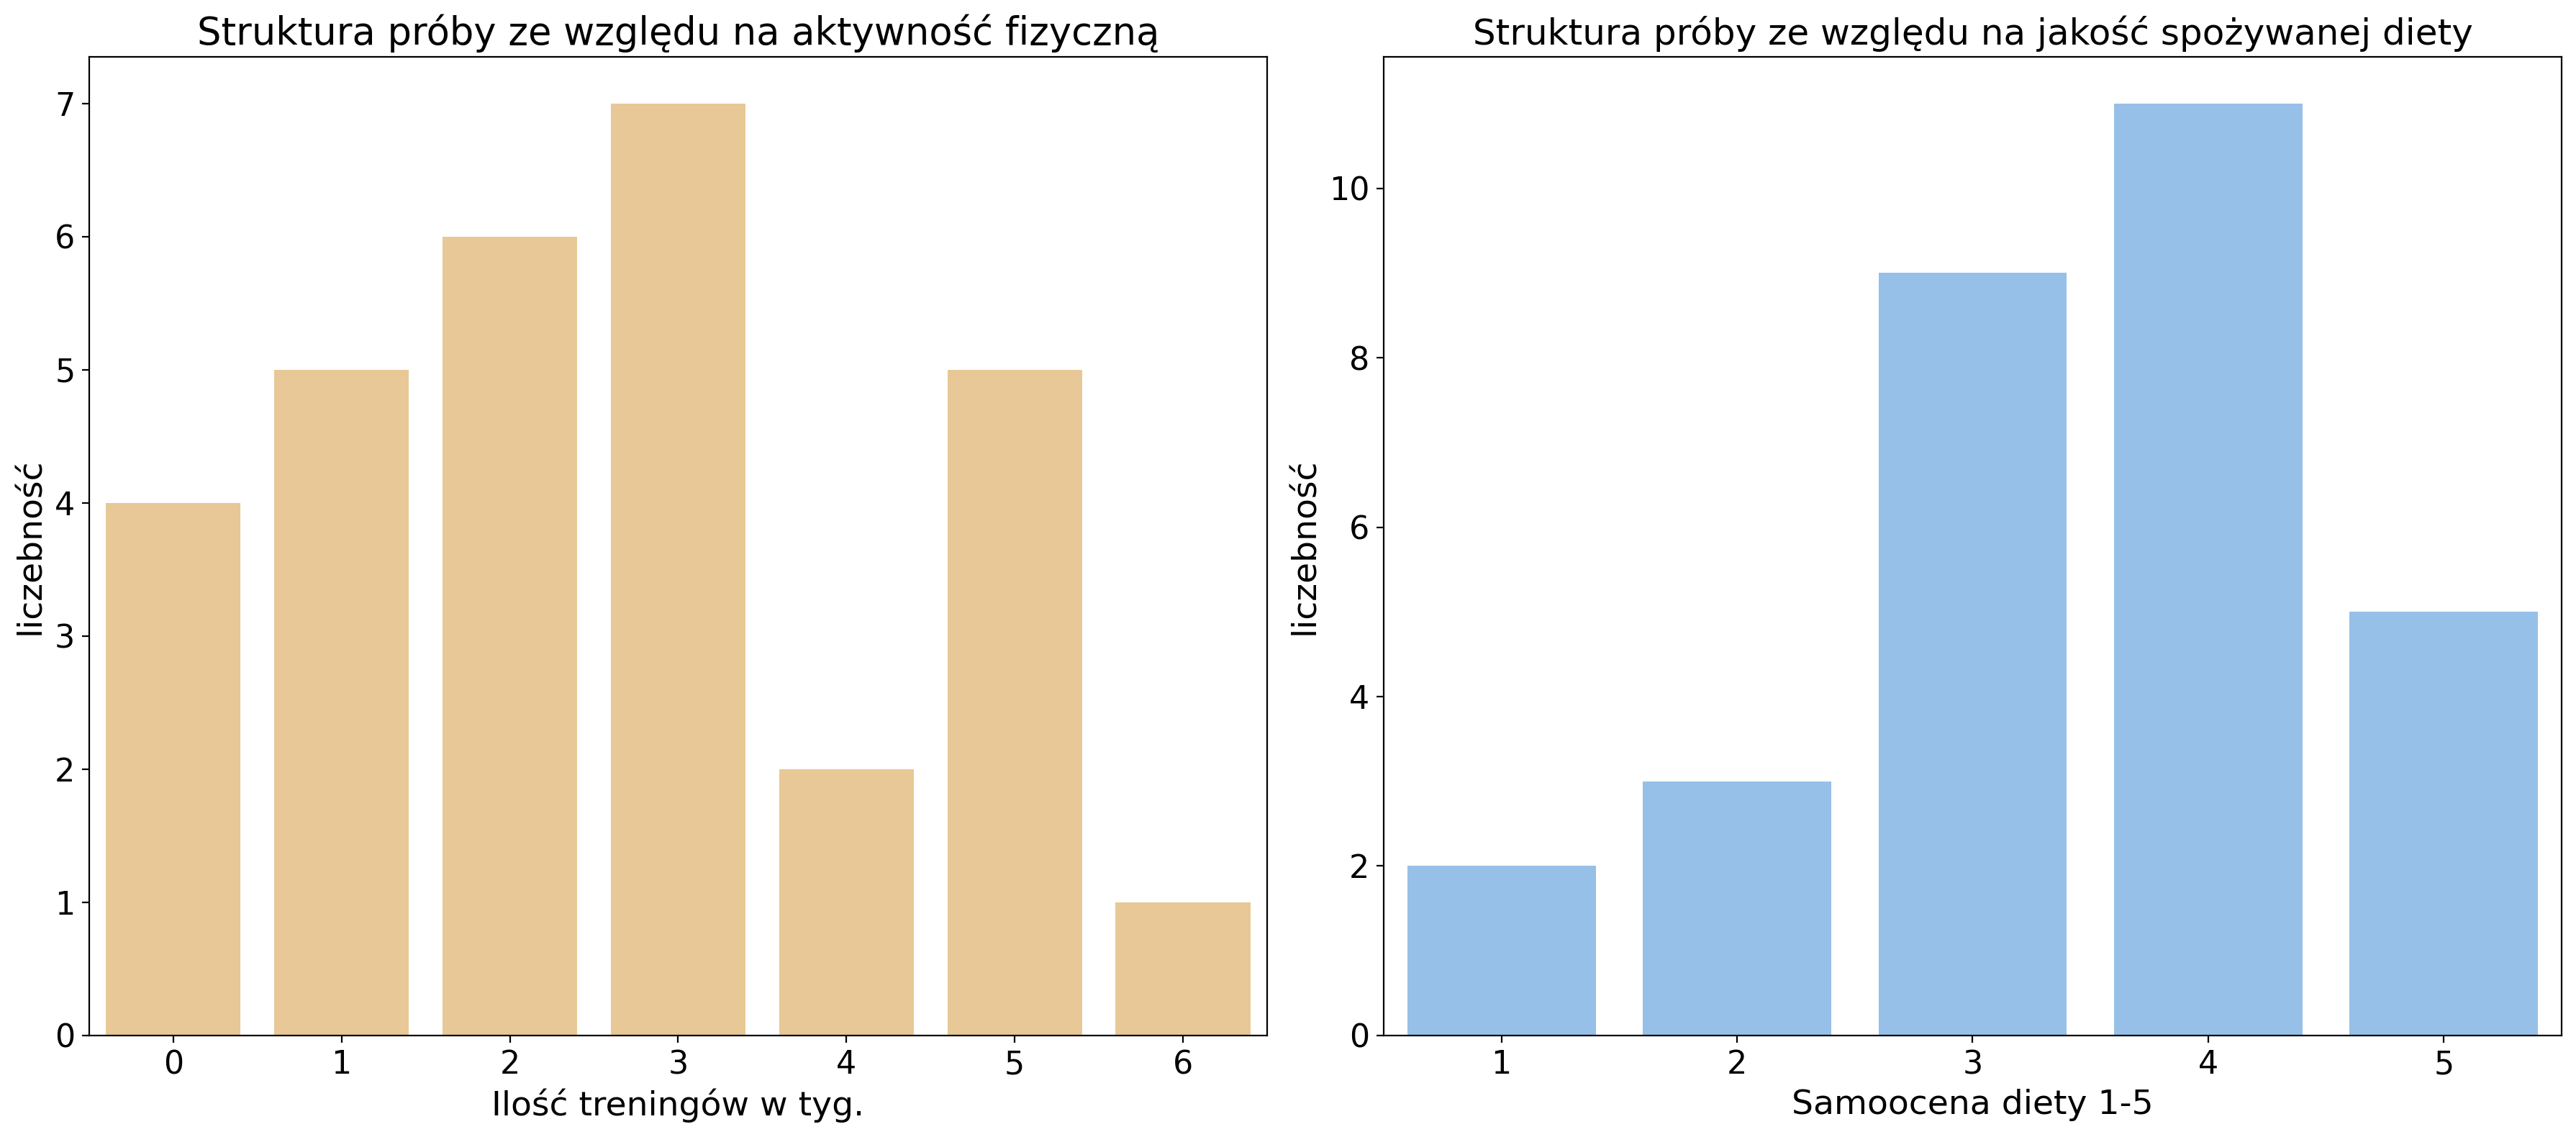

In [166]:
fig,ax=plt.subplots(figsize=(18,8),dpi=200,nrows=1,ncols=2)
sns.countplot(data=df,x='pyt_28_ilosc_treningow',
              ax=ax[0], legend=False,color='#f5cb88')
ax[0].set_title('Struktura próby ze względu na aktywność fizyczną',fontsize=19)
ax[0].set_xlabel('Ilość treningów w tyg.',fontsize=17)
ax[0].set_ylabel('liczebność',fontsize=17)
ax[0].tick_params(labelsize=16)

sns.countplot(data=df,x='pyt_27_jakosc_diety',
              ax=ax[1],legend=False,color='#88c0f5')
ax[1].set_title('Struktura próby ze względu na jakość spożywanej diety',fontsize=18)
ax[1].set_xlabel('Samoocena diety 1-5',fontsize=17)
ax[1].set_ylabel('liczebność',fontsize=17)
ax[1].tick_params(labelsize=16)

plt.tight_layout()


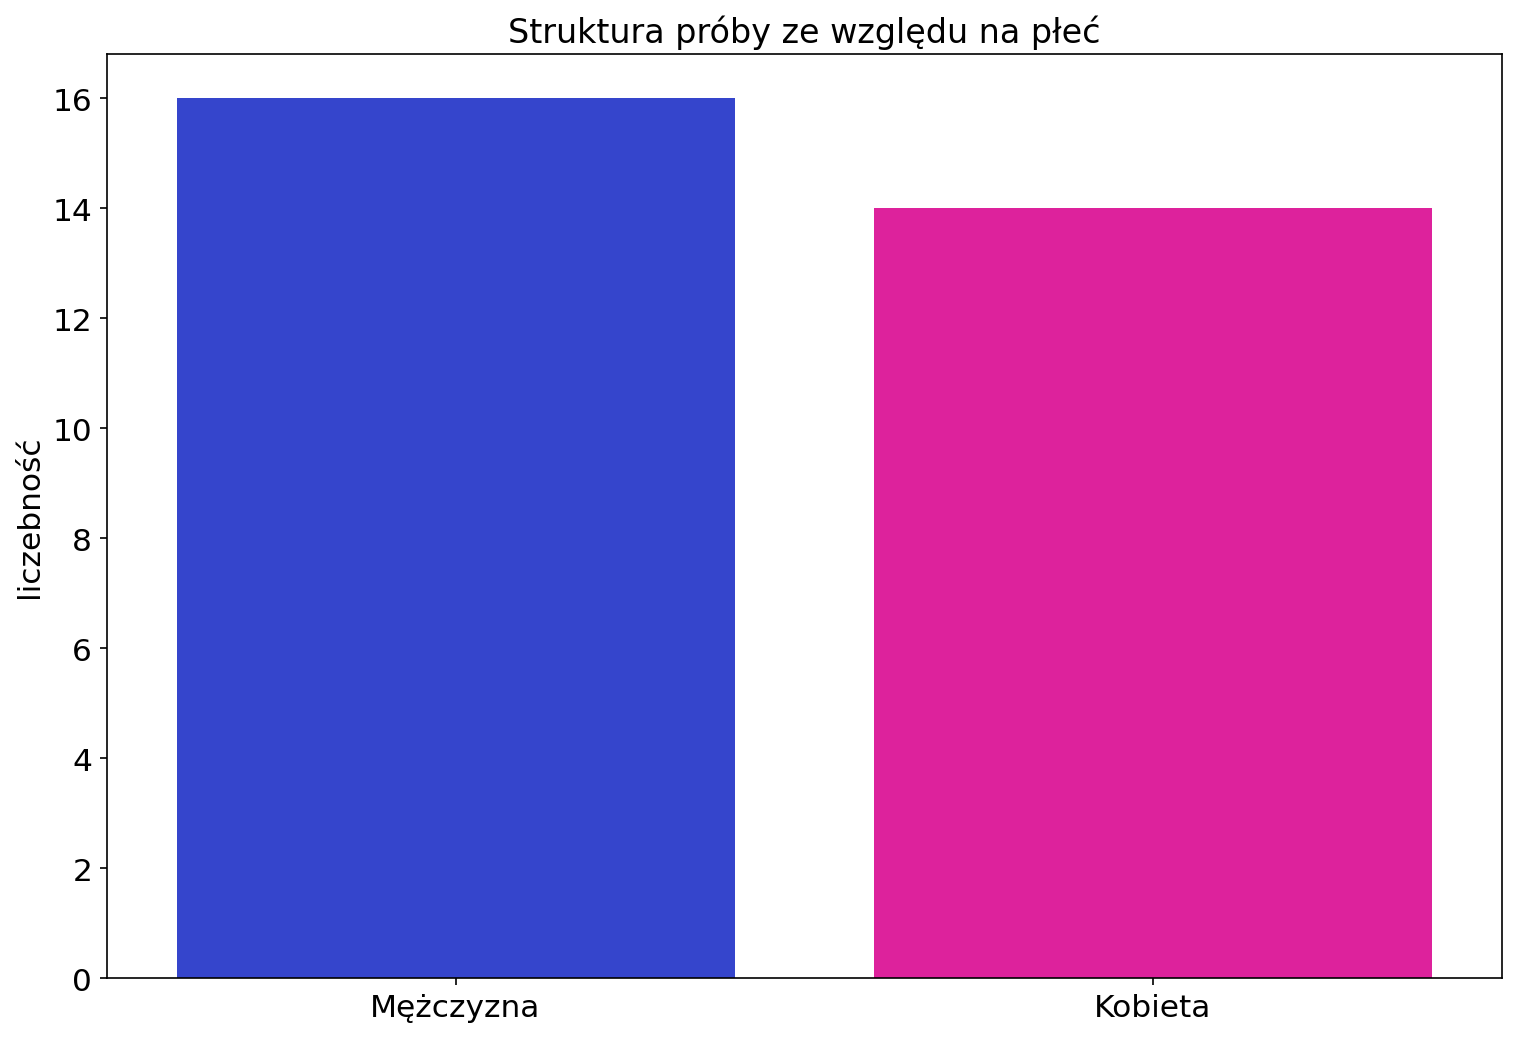

In [160]:
plt.figure(figsize=(12,8),dpi=150)
c_map = {'Mężczyzna':'#1c31e5',
         'Kobieta':'#fc03a5'}
sns.countplot(data=df,x='pyt_26_plec',
             hue='pyt_26_plec',palette=c_map)
plt.title('Struktura próby ze względu na płeć',fontsize=16)
plt.xlabel('')
plt.ylabel('liczebność',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


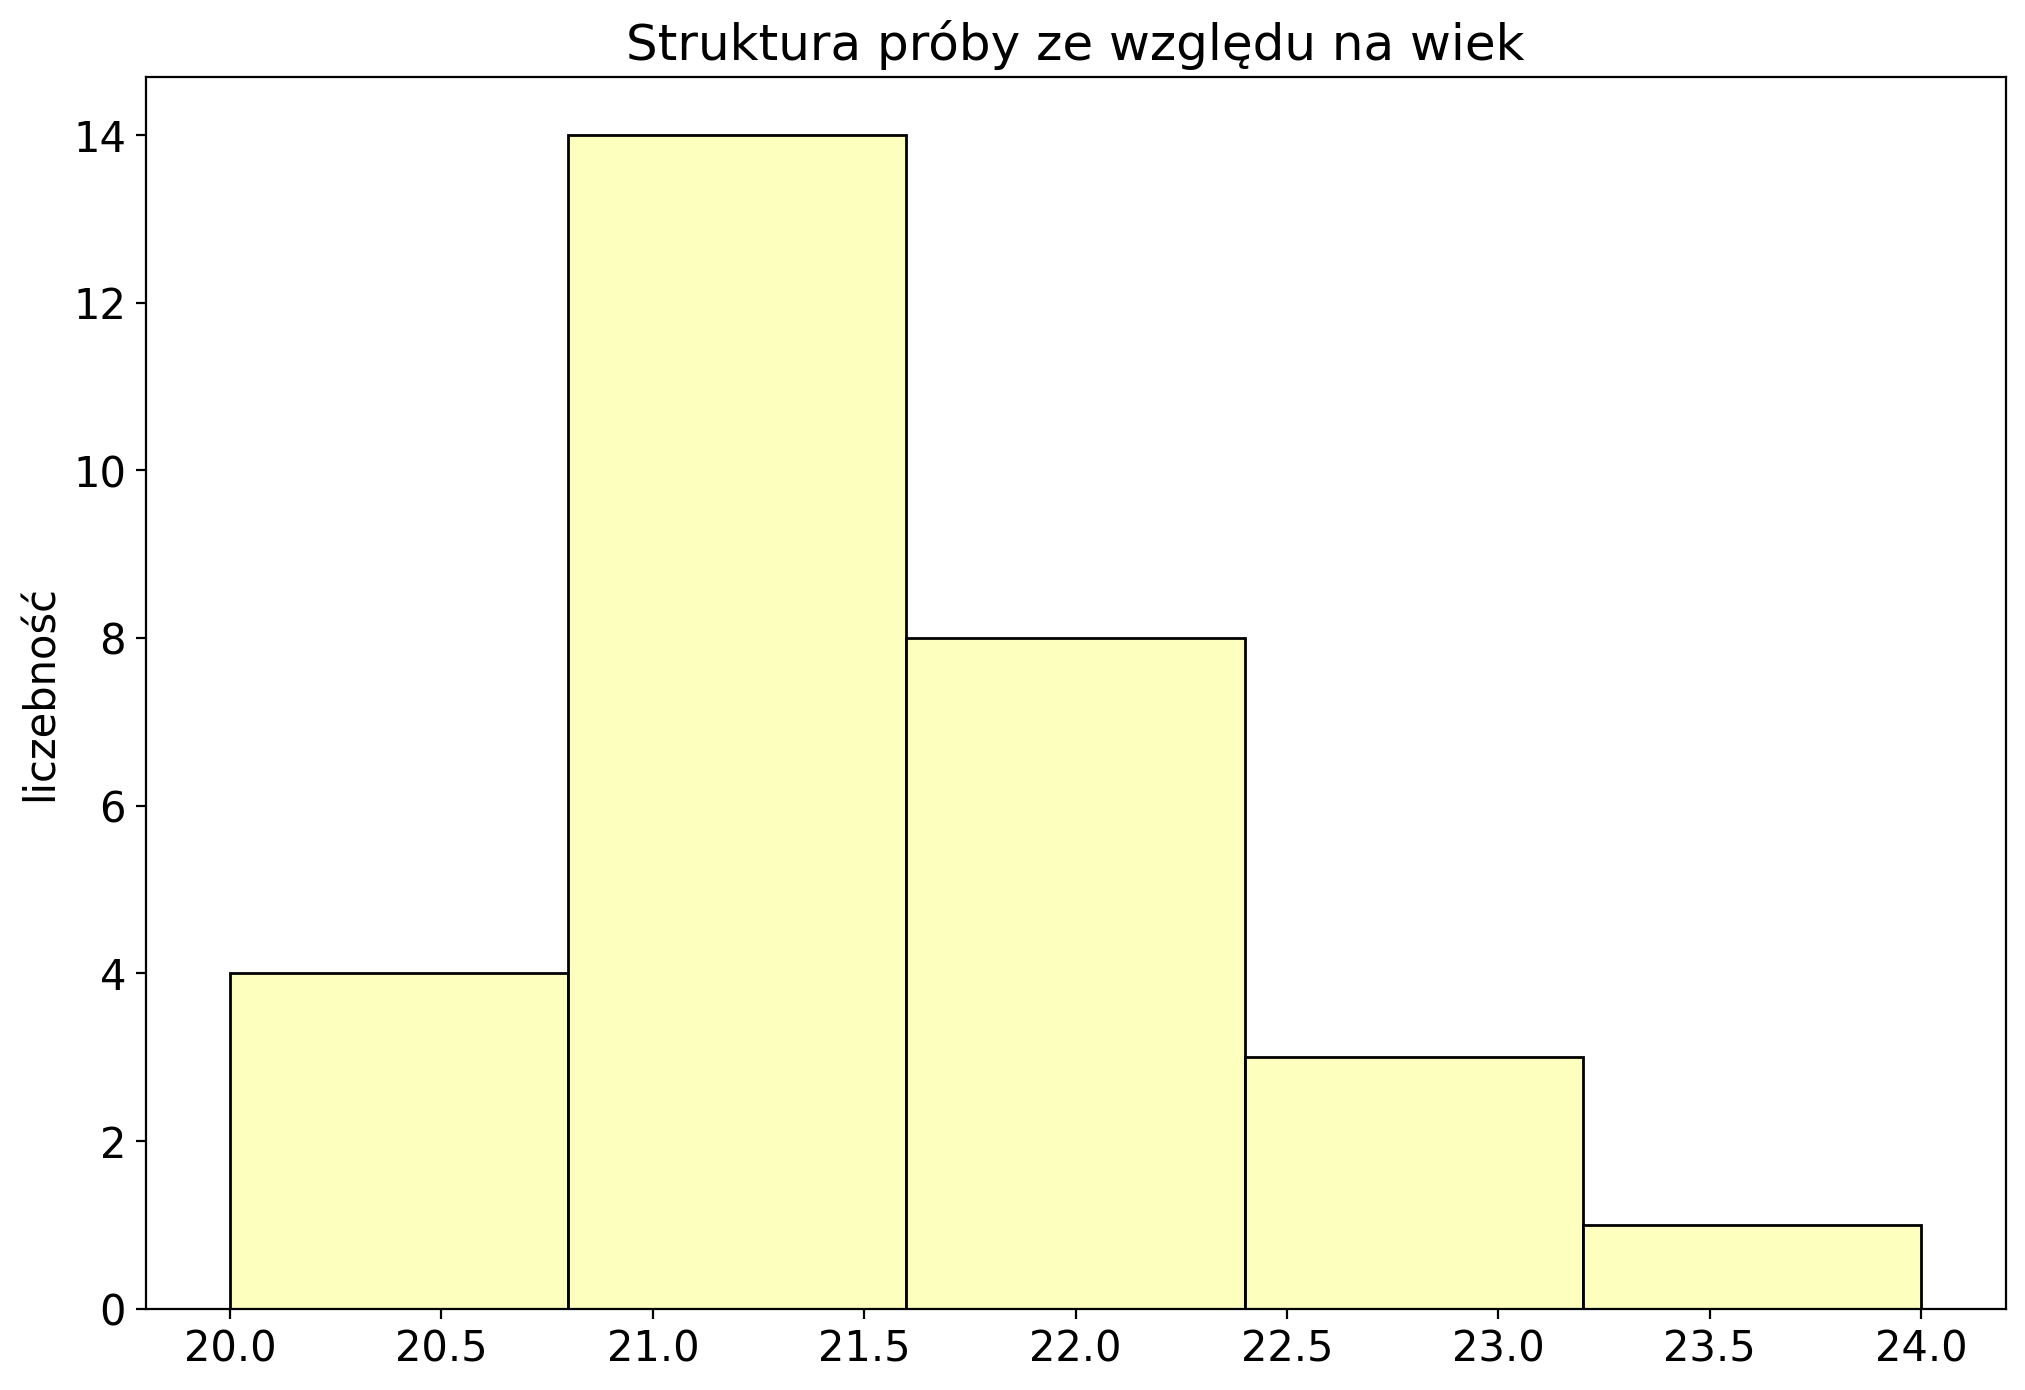

In [159]:
df['pyt_31_wiek']
plt.figure(figsize=(12,8),dpi=200)
sns.histplot(data=df,x='pyt_31_wiek',
             legend=False,bins=5,
            color='#fcffa9')
plt.title('Struktura próby ze względu na wiek',fontsize=18)
plt.xlabel('')
plt.ylabel('liczebność',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


<font size="8">**Pytania 2-10**</font>


In [7]:
mean_vector = df.loc[:,'preferencja_Pilos':'cena_Mlekovita'].mean(axis=0).round(1)

In [182]:
df_means = pd.DataFrame(data=mean_vector.values.reshape(9,9),columns=["Preferencja", "Świadomość", "Priorytet",
                                  "Identyfikacja", "Lojalność", "Referencja",
                                  "Prestiż", "Jakość", "Wartość"],index=["Pilos","Muller","Piatnica","Valio","Ehrmann","Łaciate","GoActive","Danone","Mlekovita"
])


In [183]:
df_means

,Preferencja,Świadomość,Priorytet,Identyfikacja,Lojalność,Referencja,Prestiż,Jakość,Wartość
Pilos,8.4,6.9,9.5,3.2,2.9,6.8,6.6,6.0,6.8
Muller,3.2,3.5,4.0,1.2,0.9,3.0,2.9,2.6,3.0
Piatnica,3.2,2.8,3.5,1.2,0.9,2.2,2.6,2.1,2.3
Valio,7.7,6.2,8.9,3.1,2.3,5.9,5.9,6.4,6.4
Ehrmann,7.6,6.4,9.9,3.2,2.0,5.5,5.1,4.8,5.3
Łaciate,4.7,4.0,5.7,1.9,1.6,3.7,3.6,3.4,3.3
GoActive,5.8,7.1,6.9,3.4,3.2,5.2,4.6,4.9,5.2
Danone,6.3,5.5,7.6,2.6,2.3,5.3,5.1,5.2,5.0
Mlekovita,4.2,3.2,4.7,1.5,1.1,3.4,3.2,3.0,3.0


In [184]:
rynek = pd.Series(data=np.repeat(7.89,9),index=df_means.index,name='Rynek')


In [185]:
df_means = pd.concat([df_means,rynek],axis=1)

In [186]:
gender_means = df.loc[:, 'preferencja_Pilos':'cena_Mlekovita'].groupby(by=df['pyt_26_plec']).mean()

In [187]:
woman_means = pd.DataFrame(data = gender_means.iloc[0,:].values.reshape(9,9),columns=["Preferencja", "Świadomość", "Priorytet",
                                  "Identyfikacja", "Lojalność", "Referencja",
                                  "Prestiż", "Jakość", "Wartość"],index=["Pilos","Muller","Piatnica","Valio","Ehrmann","Łaciate","GoActive","Danone","Mlekovita"
])

woman_means = pd.concat([woman_means,rynek],axis=1)

In [188]:
gender_means

,preferencja_Pilos,preferencja_Muuler,preferencja_Piatnica,preferencja_Valio,preferencja_Ehremann,preferencja_Laciate,preferencja_GoActive,preferencja_YoPro,preferencja_Mlekowita,rozpoznawalnosc_Pilos,rozpoznawalnosc_Muller,rozpoznawalnosc_Piatnica,rozpoznawalnosc_Valio,rozpoznawalnosc_Ehrmann,rozpoznawalnosc_Laciate,rozpoznawalnosc_GoActive,rozpoznawalnosc_YoPro,rozpoznawalnosc_Mlekovita,swiadomosc_Pilos,swiadomosc_Muller,swiadomosc_Piatnica,swiadomosc_Valio,swiadomosc_Ehrmann,swiadomosc_Laciate,swiadomosc_GoActive,swiadomosc_YoPro,swiadomosc_Mlekovita,identyfikacja_Pilos,identyfikacja_Muller,identyfikacja_Piatnica,identyfikacja_Valio,identyfikacja_Ehrmann,identyfikacja_Laciate,identyfikacja_GoActive,identyfikacja_YoPro,identyfikacja_Mlekovita,czestotliwosc_wyboru_Pilos,czestotliwosc_wyboru_Muller,czestotliwosc_wyboru_Piatnica,czestotliwosc_wyboru_Valio,czestotliwosc_wyboru_Ehrmann,czestotliwosc_wyboru_Laciate,czestotliwosc_wyboru_GoActive,czestotliwosc_wyboru_YoPro,czestotliwosc_wyboru_Mlekovita,polecalnosc_Pilos,polecalnosc_Muller,polecalnosc_Piatnica,polecalnosc_Valio,polecalnosc_Ehrmann,polecalnosc_Laciate,polecalnosc_GoActive,polecalnosc_YoPro,polecalnosc_Mlekovita,prestiz_Pilos,prestiz_Muller,prestiz_Piatnica,prestiz_Valio,prestiz_Ehrmann,prestiz_Laciate,prestiz_GoActive,prestiz_YoPro,prestiz_Mlekovita,jakosc_Pilos,jakosc_Muller,jakosc_Piatnica,jakosc_Valio,jakosc_Ehrmann,jakosc_Laciate,jakosc_GoActive,jakosc_YoPro,jakosc_Mlekovita,cena_Pilos,cena_Muller,cena_Piatnica,cena_Valio,cena_Ehrmann,cena_Laciate,cena_GoActive,cena_YoPro,cena_Mlekovita
pyt_26_plec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kobieta,7.928571,5.785714,8.214286,4.071429,3.142857,6.428571,6.571429,4.928571,5.642857,3.285714,3.5000,3.571429,1.642857,1.214286,2.5,3.071429,2.500,2.714286,3.214286,2.357143,3.071429,1.571429,1.071429,2.142857,2.571429,1.857143,1.714286,6.571429,5.857143,6.857143,3.785714,3.142857,5.5000,6.642857,5.571429,4.857143,7.50,5.857143,9.428571,4.571429,2.642857,5.642857,5.714286,4.071429,3.714286,4.428571,3.785714,5.214286,2.785714,2.142857,3.571429,3.571429,2.642857,2.357143,5.285714,7.285714,6.714286,3.714286,3.000,5.071429,5.357143,4.642857,4.857143,5.5,5.142857,6.928571,3.142857,2.571429,4.714286,5.642857,4.642857,4.071429,4.0000,3.0000,4.428571,1.785714,1.50,3.214286,3.142857,3.0000,2.642857
Mężczyzna,8.750000,7.937500,10.687500,2.375000,2.687500,7.187500,6.687500,7.000000,7.812500,3.062500,3.5625,4.437500,0.750000,0.625000,3.5,2.750000,2.625,3.250000,3.125000,3.187500,3.875000,0.812500,0.750000,2.250000,2.687500,2.375000,2.750000,8.687500,6.437500,10.625000,2.437500,1.562500,6.3125,5.250000,7.125000,7.812500,7.75,6.812500,10.250000,1.937500,1.437500,5.375000,4.625000,5.375000,6.687500,4.875000,4.187500,6.125000,1.187500,1.125000,3.875000,3.625000,4.125000,4.125000,6.312500,6.875000,7.125000,3.187500,3.375,5.312500,4.000000,5.125000,5.500000,7.0,5.875000,8.125000,2.187500,2.062500,5.875000,4.625000,5.687500,5.750000,4.4375,3.4375,4.875000,1.250000,0.75,3.500000,3.250000,2.9375,3.312500


In [189]:
man_means =  pd.DataFrame(data = gender_means.iloc[1,:].values.reshape(9,9),columns=["Preferencja", "Świadomość", "Priorytet",
                                  "Identyfikacja", "Lojalność", "Referencja",
                                  "Prestiż", "Jakość", "Wartość"],index=["Pilos","Muller","Piatnica","Valio","Ehrmann","Łaciate","GoActive","Danone","Mlekovita"
])

man_means = pd.concat([man_means,rynek],axis=1)

In [190]:
wyniki_ogl = df_means.sum(axis=1)
wyniki_mezczyzn = man_means.sum(axis=1)
wyniki_kobiet = woman_means.sum(axis=1)

In [191]:
wyniki_ogl = wyniki_ogl.sort_values(ascending=False)

In [192]:
wyniki_kobiet = wyniki_kobiet.reindex(wyniki_ogl.index)
wyniki_mezczyzn = wyniki_mezczyzn.reindex(wyniki_ogl.index)

In [194]:
wyniki_kobiet

Pilos        60.604286
Valio        56.675714
Ehrmann      57.032857
GoActive     53.818571
Danone       50.247143
Łaciate      38.390000
Mlekovita    34.604286
Muller       31.890000
Piatnica     27.461429
dtype: float64

In [199]:
trace1 = go.Bar(x=wyniki_ogl.index,y=wyniki_ogl,
                name='Ogółem',marker=dict(color='#09963b'))

trace2 = go.Bar(x=wyniki_mezczyzn.index,y=wyniki_mezczyzn,
                name='Mężczyźni',marker=dict(color='#4103fc'))

trace3 = go.Bar(x=wyniki_kobiet.index,y=wyniki_kobiet,
                name='Kobiety',marker=dict(color='#fc03a5'))

data = [trace1, trace2, trace3]

layout = go.Layout(title='Średnia ocena marki wśród studentów',titlefont=dict(size=42),
                  xaxis=dict(title='Marka',
                            titlefont=dict(size=28),
                             tickfont=dict(size=20)),
                   yaxis=dict(title='Przeciętny wynik',
                             titlefont=dict(size=35),
                             tickfont=dict(size=30)),
                  legend=dict(font=dict(size=30 )))

fig = go.Figure(data=data,layout=layout)

pyo.plot(fig)
                   
                



'temp-plot.html'

<font size="8">**Pytanie 1 skojarzenia**</font>

In [20]:
y=df['skojarzenie_1'].str.lower().str.strip().value_counts()
x=df['skojarzenie_2'].str.lower().str.strip().value_counts()
z=df['skojarzenie_3'].str.lower().str.strip().value_counts()

In [21]:
wszystkie_skojarzenia=pd.concat([x,y,z],axis=0).sort_values(ascending=False)

In [22]:
wszystkie_skojarzenia = pd.concat([x, y, z], axis=0)
wszystkie_skojarzenia = wszystkie_skojarzenia.groupby(wszystkie_skojarzenia.index.str.lower().str.strip()).sum().sort_values(ascending=False)


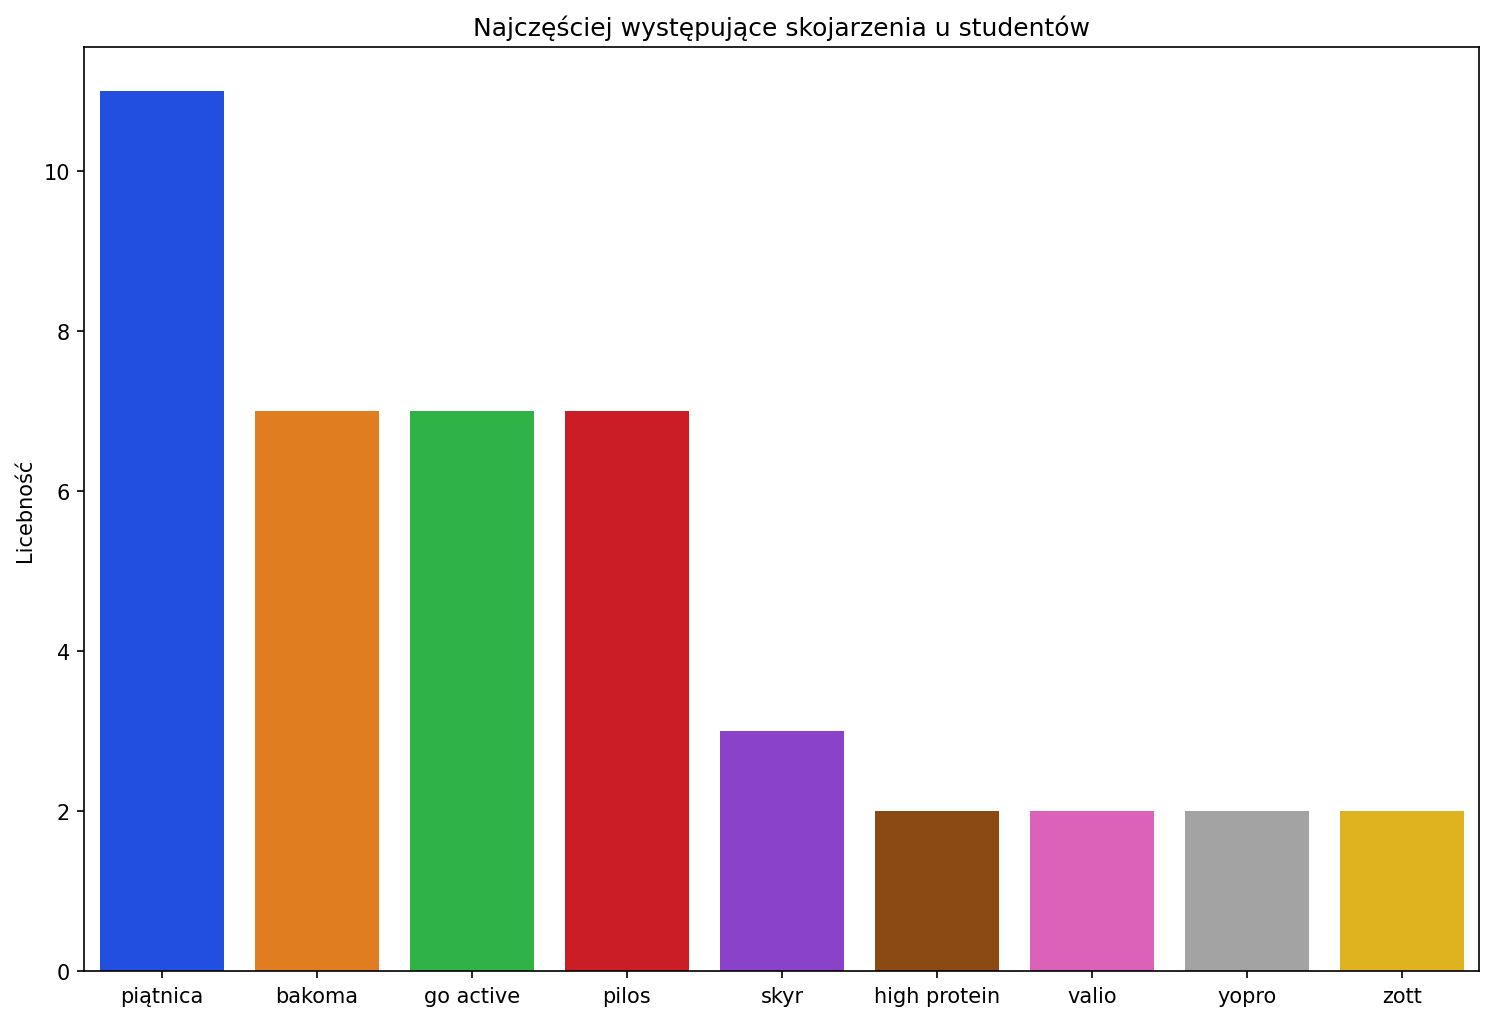

In [23]:
x=wszystkie_skojarzenia[wszystkie_skojarzenia>=2].index
y=wszystkie_skojarzenia[wszystkie_skojarzenia>=2].values

plt.figure(figsize=(12,8),dpi=150)
sns.barplot(x=x,
            y=y,hue=x
            ,palette='bright')
plt.xlabel('')
plt.ylabel('Licebność')
plt.title('Najczęściej występujące skojarzenia u studentów')

plt.savefig('D:\mszcz\Documents\Badenie marketing\skojarzenia.png')

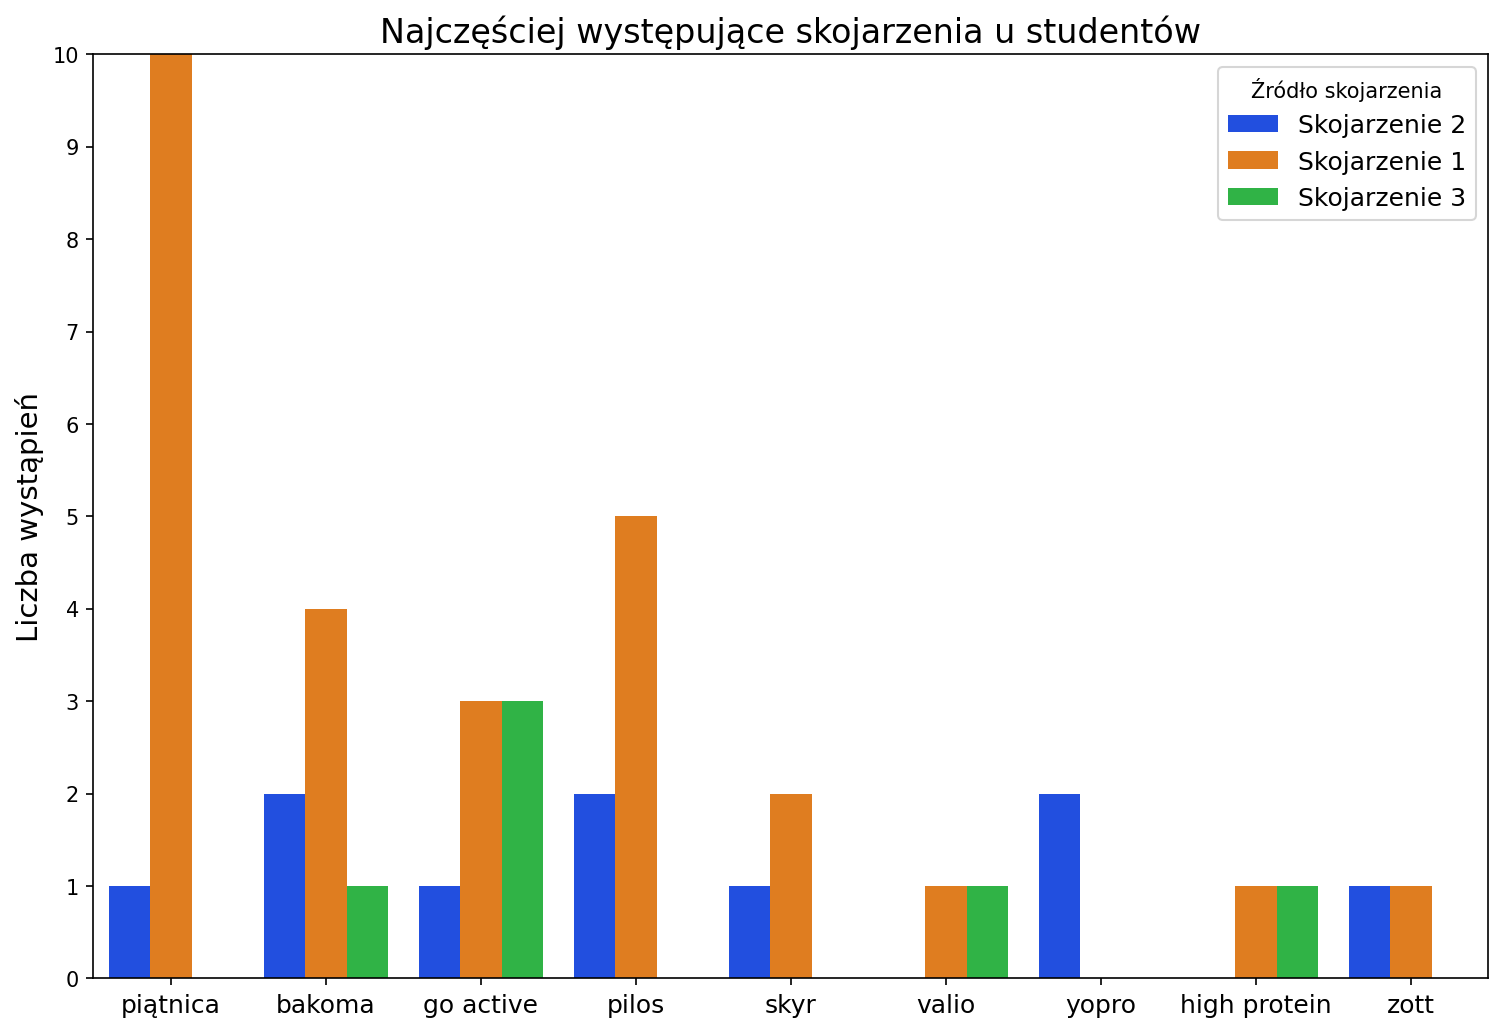

In [24]:
s1 = df['skojarzenie_1'].str.lower().str.strip()
s2 = df['skojarzenie_2'].str.lower().str.strip()
s3 = df['skojarzenie_3'].str.lower().str.strip()

all_skojarzenia = pd.concat([
    pd.DataFrame({'marka': s1, 'źródło': 'Skojarzenie 1'}),
    pd.DataFrame({'marka': s2, 'źródło': 'Skojarzenie 2'}),
    pd.DataFrame({'marka': s3, 'źródło': 'Skojarzenie 3'}),
])

grouped = all_skojarzenia.groupby(['marka', 'źródło']).size().reset_index(name='liczba')

grouped['suma_wystąpień'] = grouped.groupby('marka')['liczba'].transform('sum')

grouped = grouped.sort_values(by='suma_wystąpień', ascending=False)
grouped = grouped[grouped['suma_wystąpień']>=2]

plt.figure(figsize=(12, 8), dpi=150)
sns.barplot(data=grouped, x='marka', y='liczba', hue='źródło', palette='bright')

plt.xlabel('', fontsize=14)
plt.ylabel('Liczba wystąpień', fontsize=14)
plt.title('Najczęściej występujące skojarzenia u studentów', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Źródło skojarzenia', fontsize=12)
plt.ylim(0,10)
plt.yticks(ticks=np.arange(0,11));

In [105]:
df.head()

,skojarzenie_1,skojarzenie_2,skojarzenie_3,preferencja_Pilos,preferencja_Muuler,preferencja_Piatnica,preferencja_Valio,preferencja_Ehremann,preferencja_Laciate,preferencja_GoActive,preferencja_YoPro,preferencja_Mlekowita,rozpoznawalnosc_Pilos,rozpoznawalnosc_Muller,rozpoznawalnosc_Piatnica,rozpoznawalnosc_Valio,rozpoznawalnosc_Ehrmann,rozpoznawalnosc_Laciate,rozpoznawalnosc_GoActive,rozpoznawalnosc_YoPro,rozpoznawalnosc_Mlekovita,swiadomosc_Pilos,swiadomosc_Muller,swiadomosc_Piatnica,swiadomosc_Valio,swiadomosc_Ehrmann,swiadomosc_Laciate,swiadomosc_GoActive,swiadomosc_YoPro,swiadomosc_Mlekovita,identyfikacja_Pilos,identyfikacja_Muller,identyfikacja_Piatnica,identyfikacja_Valio,identyfikacja_Ehrmann,identyfikacja_Laciate,identyfikacja_GoActive,identyfikacja_YoPro,identyfikacja_Mlekovita,czestotliwosc_wyboru_Pilos,czestotliwosc_wyboru_Muller,czestotliwosc_wyboru_Piatnica,czestotliwosc_wyboru_Valio,czestotliwosc_wyboru_Ehrmann,czestotliwosc_wyboru_Laciate,czestotliwosc_wyboru_GoActive,czestotliwosc_wyboru_YoPro,czestotliwosc_wyboru_Mlekovita,polecalnosc_Pilos,polecalnosc_Muller,polecalnosc_Piatnica,polecalnosc_Valio,polecalnosc_Ehrmann,polecalnosc_Laciate,polecalnosc_GoActive,polecalnosc_YoPro,polecalnosc_Mlekovita,prestiz_Pilos,prestiz_Muller,prestiz_Piatnica,prestiz_Valio,prestiz_Ehrmann,prestiz_Laciate,prestiz_GoActive,prestiz_YoPro,...,jakosc_Muller,jakosc_Piatnica,jakosc_Valio,jakosc_Ehrmann,jakosc_Laciate,jakosc_GoActive,jakosc_YoPro,jakosc_Mlekovita,cena_Pilos,cena_Muller,cena_Piatnica,cena_Valio,cena_Ehrmann,cena_Laciate,cena_GoActive,cena_YoPro,cena_Mlekovita,pyt_11_smak,pyt_12_pojemnosc,pyt_13_regularnosc,pyt_14_smak,pyt_14_moda,pyt_14_aspekt_dietetyczny,pyt_14_dostepnosc,pyt_14_popularnosc_marki,pyt_14_latwosc_spożycia,pyt_15_aspekt_dietetyczny,pyt_16_pora,pyt_17_gdzie,pyt_18_opakowanie,pyt_19_smak,pyt_19_cena,pyt_19_dostepnosc,pyt_19_pojemnosc,pyt_19_skład,pyt_19_opakowanie,pyt_19_wygoda,pyt_19_wartosci,pyt_20_skojarzone_słowo,pyt_21_bialko,pyt_21_tluszcz,pyt_21_wegle,pyt_22_cena,pyt_22_pojemnosc,pyt_23_KCAL,pyt_24_1,pyt_24_2,pyt_24_3,pyt_24_4,pyt_24_5,pyt_24_6,pyt_24_7,pyt_25_1,pyt_25_2,pyt_25_3,pyt_25_4,pyt_25_5,pyt_25_6,pyt_25_7,pyt_26_plec,pyt_27_jakosc_diety,pyt_28_ilosc_treningow,pyt_29_cel,pyt_30_miasto,pyt_31_wiek
0,piątnica,NaN,NaN,14,14,14,12,12,14,14,12,14,5,5,5,3,2,5,5,2,5,5,5,5,4,2,5,5,3,5,15,15,15,12,10,15,15,13,15,15,15,15,12,13,15,15,13,15,8,8,8,3,4,8,8,4,8,12,12,12,9,9,12,12,10,...,10,10,7,8,10,10,8,10,6,6,6,3,3,6,6,3,6,Owocowy,350 g,Tak,1,0,1,0.0,0.0,0.0,Zawartość białka,"Bezpośrednio po treningu, jako uzupełnienie bi...",Małe sklepy spożywcze (np. Żabka),Plastikowe butelki,30,30,20,0.0,20,0.0,0.0,0.0,siłownia,26.0,5.0,15,5.0,250,300,Raczej się zgadzam,Raczej się nie zgadzam,Niezdecydowany,Zdecydowanie się zgadzam,Zgadzam się,Zdecydowanie się zgadzam,Niezdecydowany,4,2,1,3,1,4,5,Mężczyzna,5,5,Utrzymanie masy ciała,Gdańsk,21
1,piątnica,NaN,NaN,7,9,14,0,0,9,7,11,12,2,5,5,0,0,5,4,5,5,3,4,5,0,0,4,2,4,5,2,3,15,0,0,9,6,11,13,3,9,14,0,0,7,6,9,11,1,3,8,0,0,6,4,7,7,5,6,12,0,0,9,6,10,...,6,10,0,0,7,5,7,8,5,5,6,0,0,5,5,5,6,Czekoladowy,250 g,Nie,1,0,0,1.0,0.0,0.0,Zawartość białka,Jako dodatek do posiłku,"Dyskonty (np. Lidl, Biedronka)",Plastikowe butelki,30,20,0,5.0,15,0.0,10.0,10.0,Białko,30.0,5.0,10,4.0,200,200,Nie zgadzam się,Raczej się zgadzam,Zgadzam się,Raczej się zgadzam,Raczej się nie zgadzam,Raczej się zgadzam,Raczej się zgadzam,5,3,3,4,2,5,6,Mężczyzna,2,2,Nie mam określonego celu związanego z moją dietą,Gdańsk,22
2,skyr,NaN,NaN,0,11,11,0,0,6,13,12,12,0,5,5,0,0,5,5,3,5,0,3,3,0,0,2,5,1,2,0,5,4,0,0,4,4,4,4,0,11,11,0,0,8,10,4,5,0,8,8,0,0,6,7,5,5,0,4,4,0,0,4,4,4,...,6,7,0,0,7,7,7,7,0,4,6,0,0,4,5,3,4,Owocowy,250 g,Tak,1,0,0,1.0,0.0,1.0,Zawartość białka,Jako osobny posiłek/przekąska,"Dyskonty (np. Lidl, Biedronka)",Plastikowe butelki,25,10,10,0.0,20,10.0,15.0,15.0,białko,12.0,4.0,40,7.0,250,200,Niezdecydowany,Raczej się zgadzam,Raczej się nie zgadzam,Zgadzam się,Raczej się zgadzam,Raczej się nie zgadzam,Zdecy

In [115]:
melted

,czynnik,wartosc
0,skojarzenie_1,piątnica
1,skojarzenie_1,piątnica
2,skojarzenie_1,skyr
3,skojarzenie_1,go active
4,skojarzenie_1,Pilos
...,...,...
85,skojarzenie_3,go active
86,skojarzenie_3,NaN
87,skojarzenie_3,NaN
88,skojarzenie_3,NaN


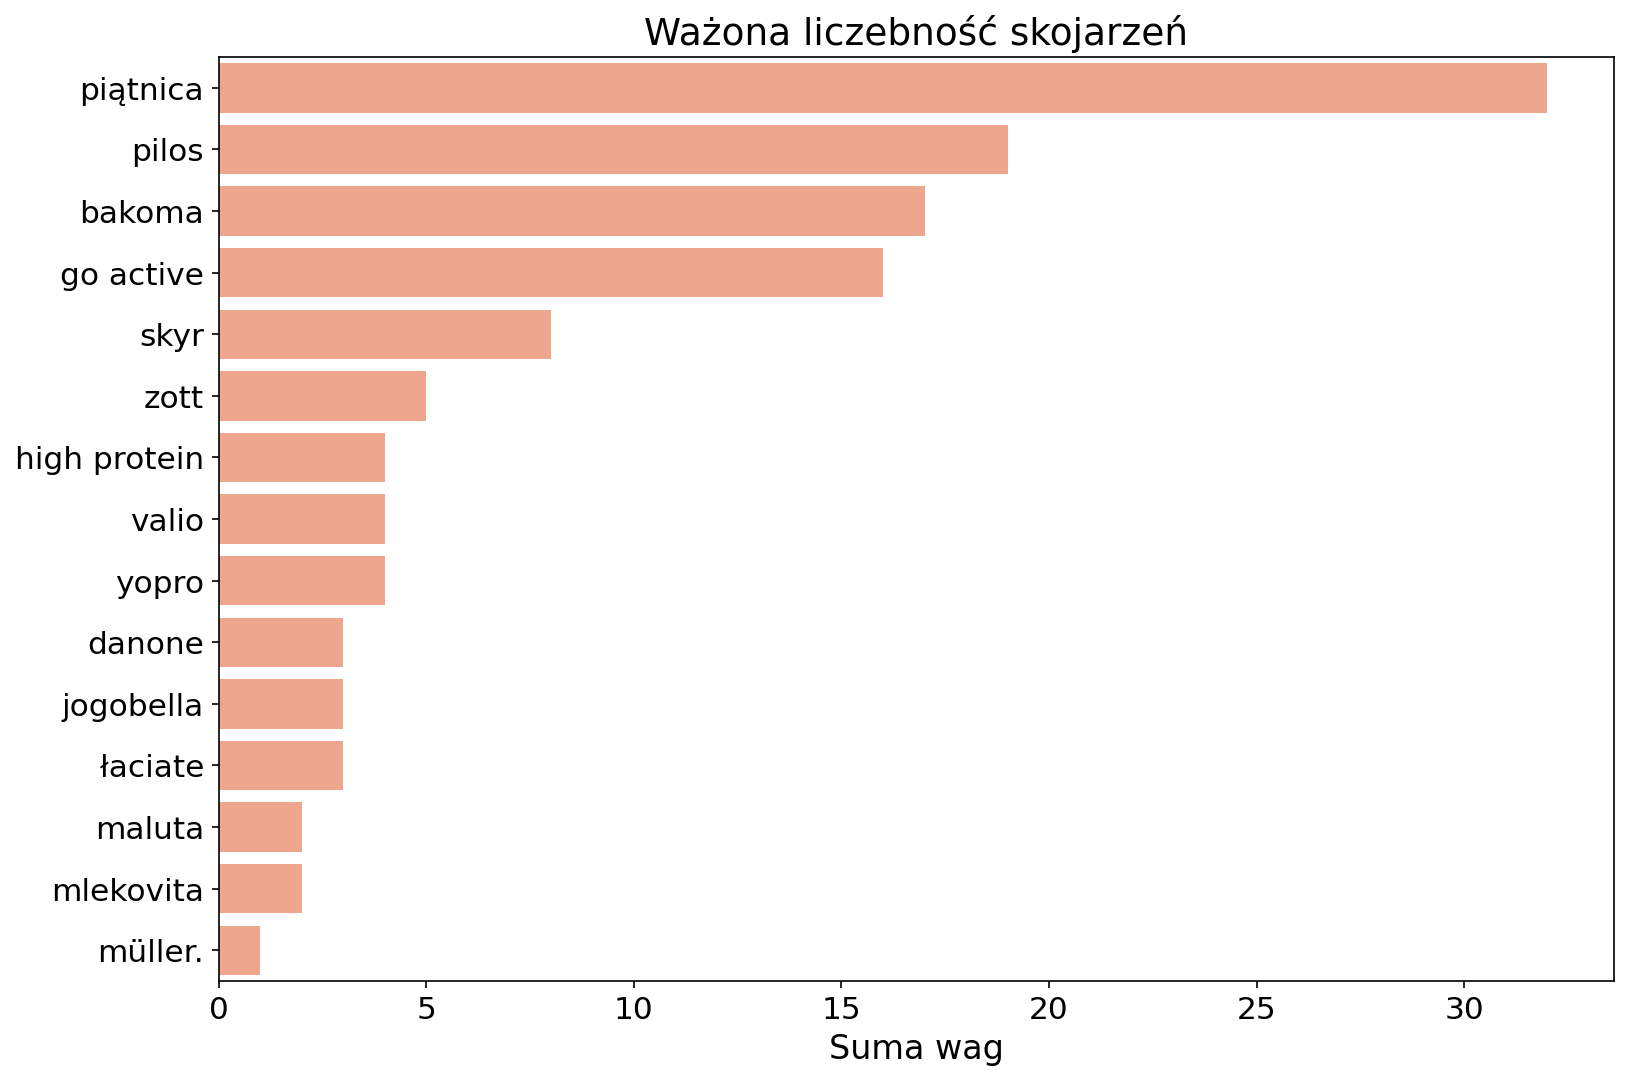

In [171]:
melted=df.loc[:,'skojarzenie_1':'skojarzenie_3'].melt(var_name='czynnik', value_name='wartosc')
melted['wartosc']=melted['wartosc'].str.lower().str.strip()
melted['wartosc']=melted['wartosc'].replace('goactive','go active')
mapa={'skojarzenie_1': 3,
     'skojarzenie_2': 2,
     'skojarzenie_3': 1}
melted['waga']=melted['czynnik'].map(mapa)

weighted_counts = melted.groupby('wartosc', as_index=False)['waga'].sum()
weighted_counts = weighted_counts.sort_values(by='waga', ascending=False)

plt.figure(figsize=(12, 8),dpi=150)
sns.barplot(data=weighted_counts,x='waga',y='wartosc',
        color='#ff9e7f')
plt.xlabel('Suma wag',fontsize=16)
plt.ylabel('')
plt.title('Ważona liczebność skojarzeń',fontsize=18)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);


<font size="6">Pyt 19. przydzielanie punktów</font>

Text(0.5, 1.0, 'Waga czynników przy zakupie jogurtu proteinowego')

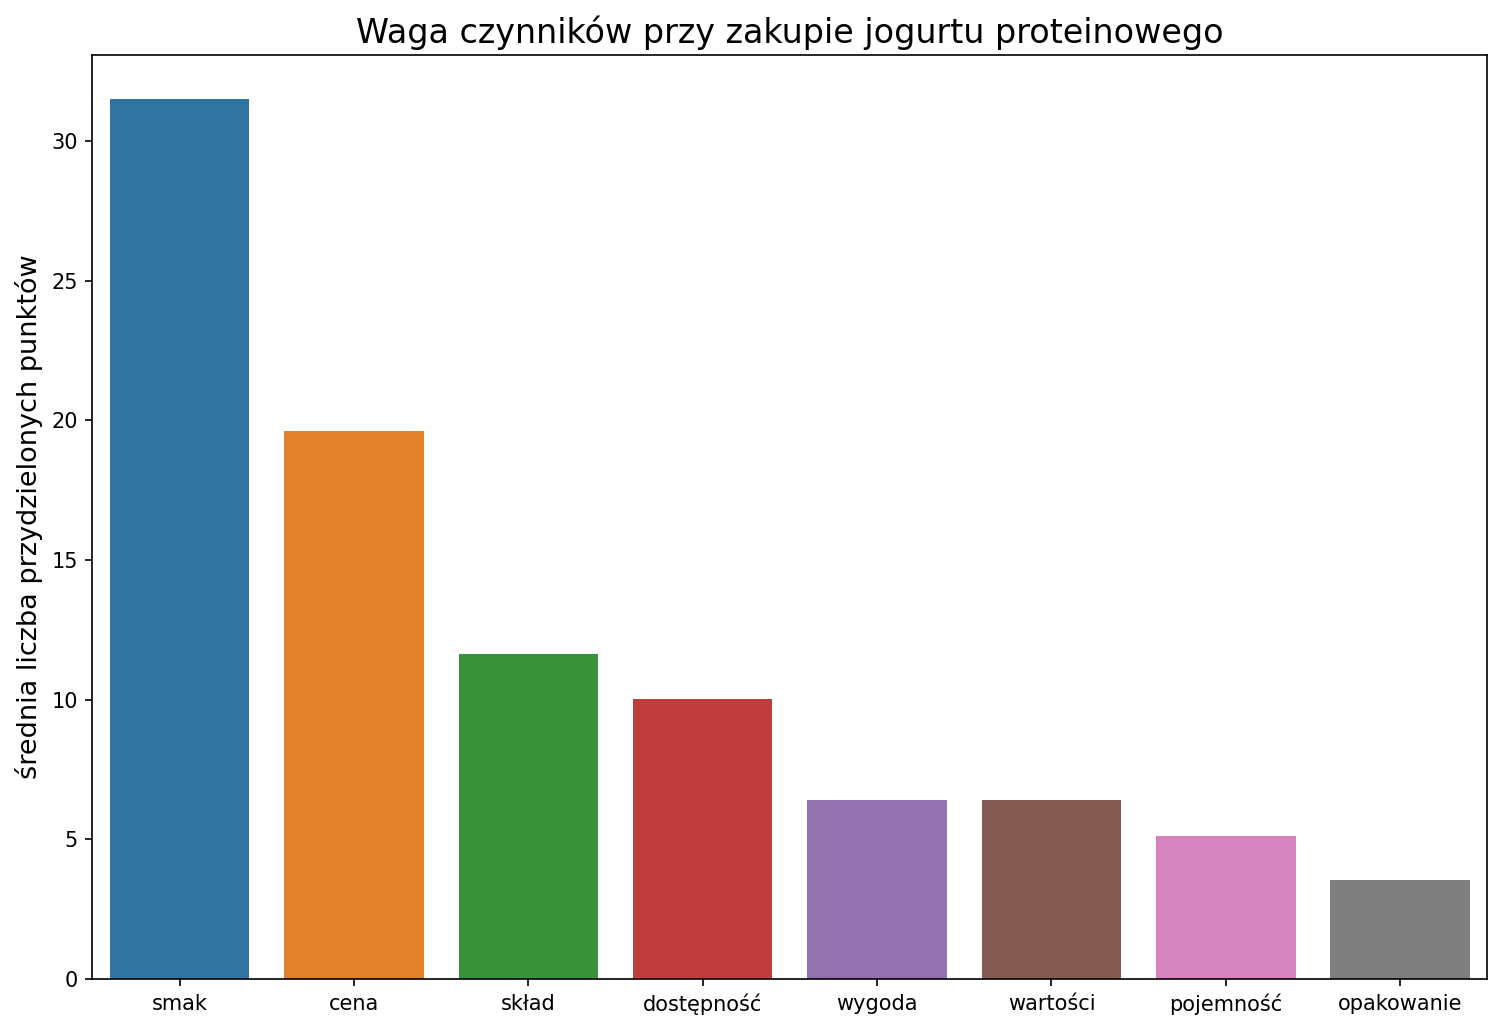

In [25]:
plt.figure(figsize=(12,8),dpi=150)
y = np.round(df.loc[:,'pyt_19_smak':'pyt_19_wartosci'].mean().sort_values(ascending=False),2)
x = ['smak','cena','skład','dostępność','wygoda','wartości','pojemność','opakowanie']

sns.barplot(x=x,y=y,hue=x)
plt.ylabel('średnia liczba przydzielonych punktów',fontsize=13)
plt.title('Waga czynników przy zakupie jogurtu proteinowego',
         fontsize=16)




In [ ]:
gender_mean_100p = df.loc[:, 'pyt_19_smak':'pyt_19_wartosci'].groupby(by=df['pyt_26_plec']).mean()
ogl_mean = df.loc[:,'pyt_19_smak':'pyt_19_wartosci'].mean()
x = gender_mean_100p.columns

ogl_mean.sort_values(ascending=False,inplace=True)
gender_mean_100p = gender_mean_100p.transpose().reindex(ogl_mean.index)

trace1 = go.Bar(x=x,y = gender_mean_100p.iloc[:,0],
                name='Kobiety',
                marker=
                dict(color='#fc03a5'))

trace3= go.Bar(x=x,y = gender_mean_100p.iloc[:,1],
                name='Mężczyźni',
                marker=
                dict(color='#4103fc'))

trace2= go.Bar(x=x,y = ogl_mean,name='Ogółem',
                marker=
                
               dict(color='#09963b'))
data = [trace1,trace2,trace3]

layout = go.Layout(title='Waga czynników przy zakupie jogurtu proteinowego, z podziałem na płeć',titlefont=dict(size=38),
                  xaxis=dict(title='Marka',
                            titlefont=dict(size=28),
                            tickfont=dict(size=20)),
                   yaxis=dict(title='Średnia liczba przydzielonych punktów',
                             titlefont=dict(size=28),
                             tickfont=dict(size=20)))

fig = go.Figure(data=data,layout=layout)

pyo.plot(fig,'Przydzielanie-punktów.html')
                   
                



<font size="8">Pytania 11 - 18</font>

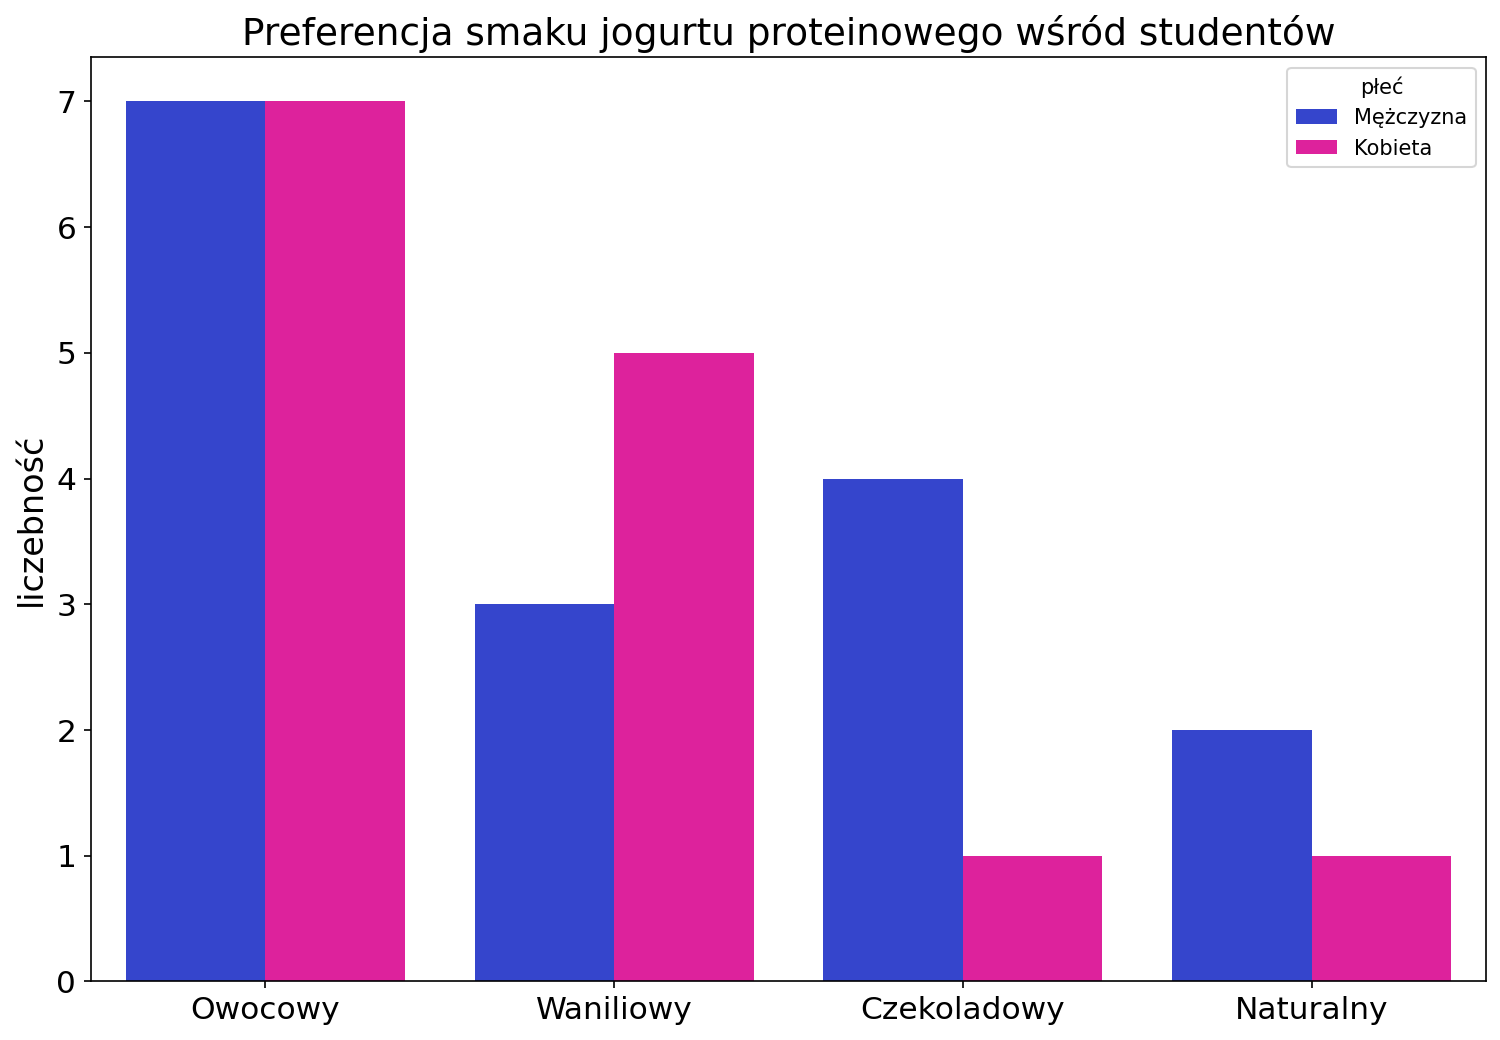

In [216]:
plt.figure(figsize=(12,8),dpi=150)
sns.countplot(data=df, x='pyt_11_smak',hue='pyt_26_plec',order=['Owocowy','Waniliowy','Czekoladowy','Naturalny'],palette=c_map)
plt.ylabel('liczebność',fontsize=16)
plt.xlabel('')
plt.legend(title='płeć')
plt.title('Preferencja smaku jogurtu proteinowego wśród studentów',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)



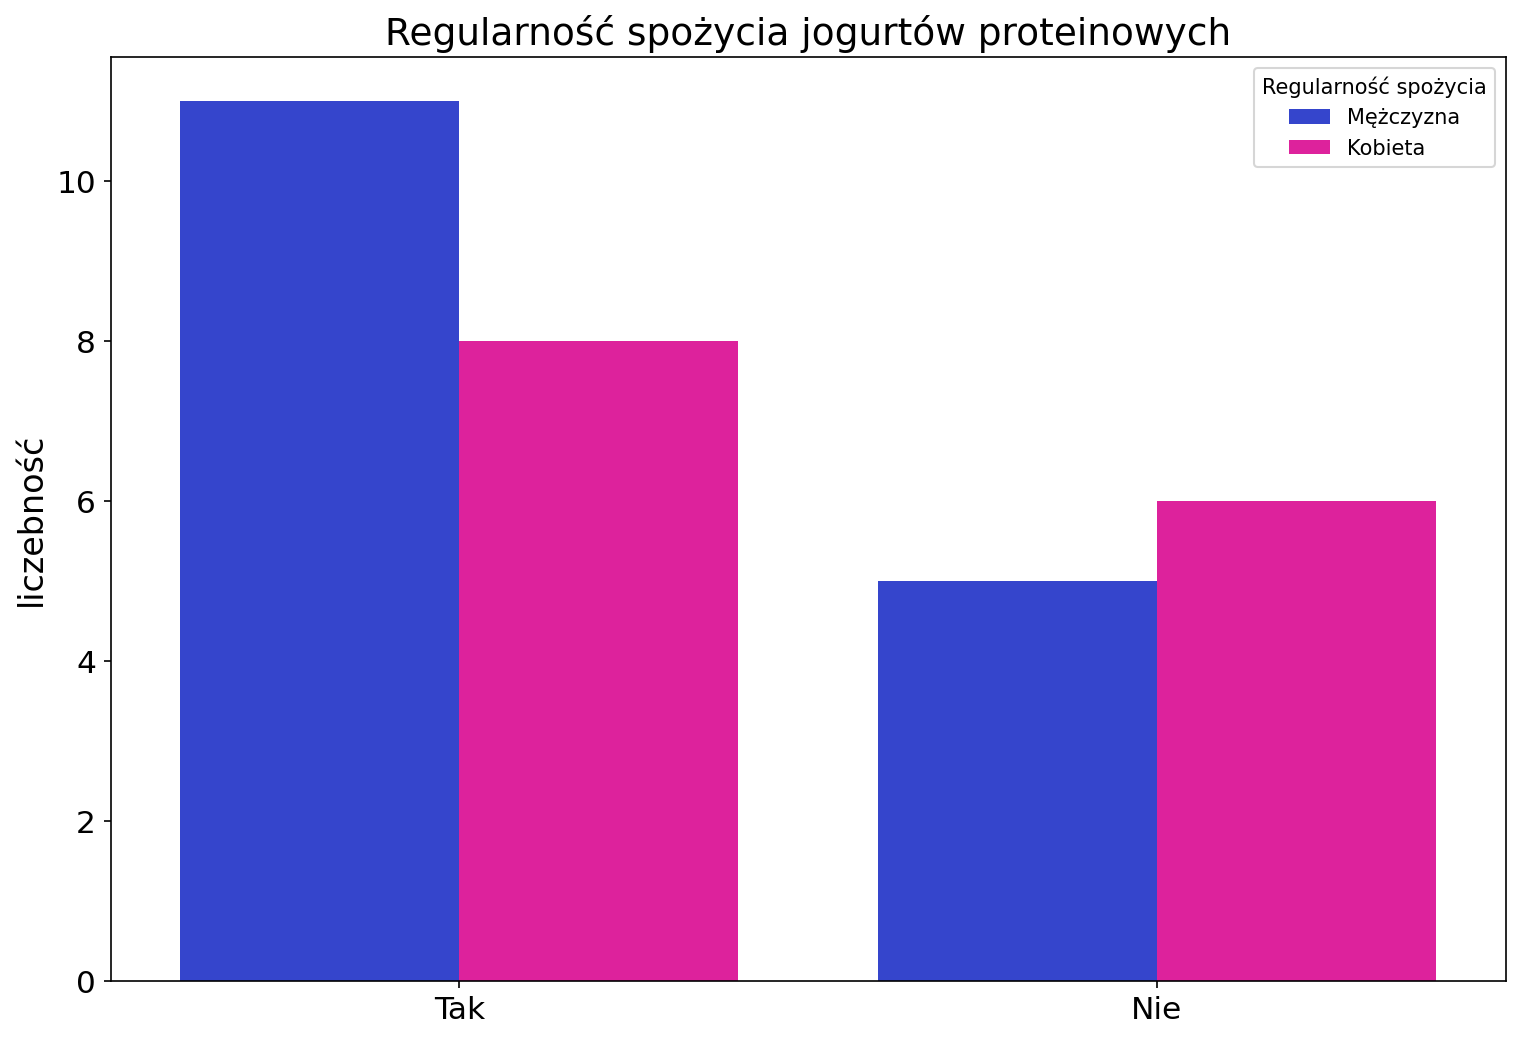

In [205]:
plt.figure(figsize=(12,8),dpi=150)
sns.countplot(data=df, x='pyt_13_regularnosc',hue='pyt_26_plec',palette=c_map)
plt.ylabel('liczebność',fontsize=16)
plt.xlabel('')
plt.legend(title='Regularność spożycia')
plt.title('Regularność spożycia jogurtów proteinowych',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


In [27]:
df.head()

,skojarzenie_1,skojarzenie_2,skojarzenie_3,preferencja_Pilos,preferencja_Muuler,preferencja_Piatnica,preferencja_Valio,preferencja_Ehremann,preferencja_Laciate,preferencja_GoActive,preferencja_YoPro,preferencja_Mlekowita,rozpoznawalnosc_Pilos,rozpoznawalnosc_Muller,rozpoznawalnosc_Piatnica,rozpoznawalnosc_Valio,rozpoznawalnosc_Ehrmann,rozpoznawalnosc_Laciate,rozpoznawalnosc_GoActive,rozpoznawalnosc_YoPro,rozpoznawalnosc_Mlekovita,swiadomosc_Pilos,swiadomosc_Muller,swiadomosc_Piatnica,swiadomosc_Valio,swiadomosc_Ehrmann,swiadomosc_Laciate,swiadomosc_GoActive,swiadomosc_YoPro,swiadomosc_Mlekovita,identyfikacja_Pilos,identyfikacja_Muller,identyfikacja_Piatnica,identyfikacja_Valio,identyfikacja_Ehrmann,identyfikacja_Laciate,identyfikacja_GoActive,identyfikacja_YoPro,identyfikacja_Mlekovita,czestotliwosc_wyboru_Pilos,czestotliwosc_wyboru_Muller,czestotliwosc_wyboru_Piatnica,czestotliwosc_wyboru_Valio,czestotliwosc_wyboru_Ehrmann,czestotliwosc_wyboru_Laciate,czestotliwosc_wyboru_GoActive,czestotliwosc_wyboru_YoPro,czestotliwosc_wyboru_Mlekovita,polecalnosc_Pilos,polecalnosc_Muller,polecalnosc_Piatnica,polecalnosc_Valio,polecalnosc_Ehrmann,polecalnosc_Laciate,polecalnosc_GoActive,polecalnosc_YoPro,polecalnosc_Mlekovita,prestiz_Pilos,prestiz_Muller,prestiz_Piatnica,prestiz_Valio,prestiz_Ehrmann,prestiz_Laciate,prestiz_GoActive,prestiz_YoPro,...,jakosc_Muller,jakosc_Piatnica,jakosc_Valio,jakosc_Ehrmann,jakosc_Laciate,jakosc_GoActive,jakosc_YoPro,jakosc_Mlekovita,cena_Pilos,cena_Muller,cena_Piatnica,cena_Valio,cena_Ehrmann,cena_Laciate,cena_GoActive,cena_YoPro,cena_Mlekovita,pyt_11_smak,pyt_12_pojemnosc,pyt_13_regularnosc,pyt_14_smak,pyt_14_moda,pyt_14_aspekt_dietetyczny,pyt_14_dostepnosc,pyt_14_popularnosc_marki,pyt_14_latwosc_spożycia,pyt_15_aspekt_dietetyczny,pyt_16_pora,pyt_17_gdzie,pyt_18_opakowanie,pyt_19_smak,pyt_19_cena,pyt_19_dostepnosc,pyt_19_pojemnosc,pyt_19_skład,pyt_19_opakowanie,pyt_19_wygoda,pyt_19_wartosci,pyt_20_skojarzone_słowo,pyt_21_bialko,pyt_21_tluszcz,pyt_21_wegle,pyt_22_cena,pyt_22_pojemnosc,pyt_23_KCAL,pyt_24_1,pyt_24_2,pyt_24_3,pyt_24_4,pyt_24_5,pyt_24_6,pyt_24_7,pyt_25_1,pyt_25_2,pyt_25_3,pyt_25_4,pyt_25_5,pyt_25_6,pyt_25_7,pyt_26_plec,pyt_27_jakosc_diety,pyt_28_ilosc_treningow,pyt_29_cel,pyt_30_miasto,pyt_31_wiek
0,piątnica,NaN,NaN,14,14,14,12,12,14,14,12,14,5,5,5,3,2,5,5,2,5,5,5,5,4,2,5,5,3,5,15,15,15,12,10,15,15,13,15,15,15,15,12,13,15,15,13,15,8,8,8,3,4,8,8,4,8,12,12,12,9,9,12,12,10,...,10,10,7,8,10,10,8,10,6,6,6,3,3,6,6,3,6,Owocowy,350 g,Tak,1,0,1,0.0,0.0,0.0,Zawartość białka,"Bezpośrednio po treningu, jako uzupełnienie bi...",Małe sklepy spożywcze (np. Żabka),Plastikowe butelki,30,30,20,0.0,20,0.0,0.0,0.0,siłownia,26.0,5.0,15,5.0,250,300,Raczej się zgadzam,Raczej się nie zgadzam,Niezdecydowany,Zdecydowanie się zgadzam,Zgadzam się,Zdecydowanie się zgadzam,Niezdecydowany,4,2,1,3,1,4,5,Mężczyzna,5,5,Utrzymanie masy ciała,Gdańsk,21
1,piątnica,NaN,NaN,7,9,14,0,0,9,7,11,12,2,5,5,0,0,5,4,5,5,3,4,5,0,0,4,2,4,5,2,3,15,0,0,9,6,11,13,3,9,14,0,0,7,6,9,11,1,3,8,0,0,6,4,7,7,5,6,12,0,0,9,6,10,...,6,10,0,0,7,5,7,8,5,5,6,0,0,5,5,5,6,Czekoladowy,250 g,Nie,1,0,0,1.0,0.0,0.0,Zawartość białka,Jako dodatek do posiłku,"Dyskonty (np. Lidl, Biedronka)",Plastikowe butelki,30,20,0,5.0,15,0.0,10.0,10.0,Białko,30.0,5.0,10,4.0,200,200,Nie zgadzam się,Raczej się zgadzam,Zgadzam się,Raczej się zgadzam,Raczej się nie zgadzam,Raczej się zgadzam,Raczej się zgadzam,5,3,3,4,2,5,6,Mężczyzna,2,2,Nie mam określonego celu związanego z moją dietą,Gdańsk,22
2,skyr,NaN,NaN,0,11,11,0,0,6,13,12,12,0,5,5,0,0,5,5,3,5,0,3,3,0,0,2,5,1,2,0,5,4,0,0,4,4,4,4,0,11,11,0,0,8,10,4,5,0,8,8,0,0,6,7,5,5,0,4,4,0,0,4,4,4,...,6,7,0,0,7,7,7,7,0,4,6,0,0,4,5,3,4,Owocowy,250 g,Tak,1,0,0,1.0,0.0,1.0,Zawartość białka,Jako osobny posiłek/przekąska,"Dyskonty (np. Lidl, Biedronka)",Plastikowe butelki,25,10,10,0.0,20,10.0,15.0,15.0,białko,12.0,4.0,40,7.0,250,200,Niezdecydowany,Raczej się zgadzam,Raczej się nie zgadzam,Zgadzam się,Raczej się zgadzam,Raczej się nie zgadzam,Zdecy

In [207]:
df.loc[29,'pyt_14_smak':'pyt_14_latwosc_spożycia']={'pyt_14_smak':0,'pyt_14_moda':0,'pyt_14_aspekt_dietetyczny':1,
                                                    'pyt_14_dostepnosc':0,'pyt_14_popularnosc_mark':0,'pyt_14_latwosc_spożycia':1}

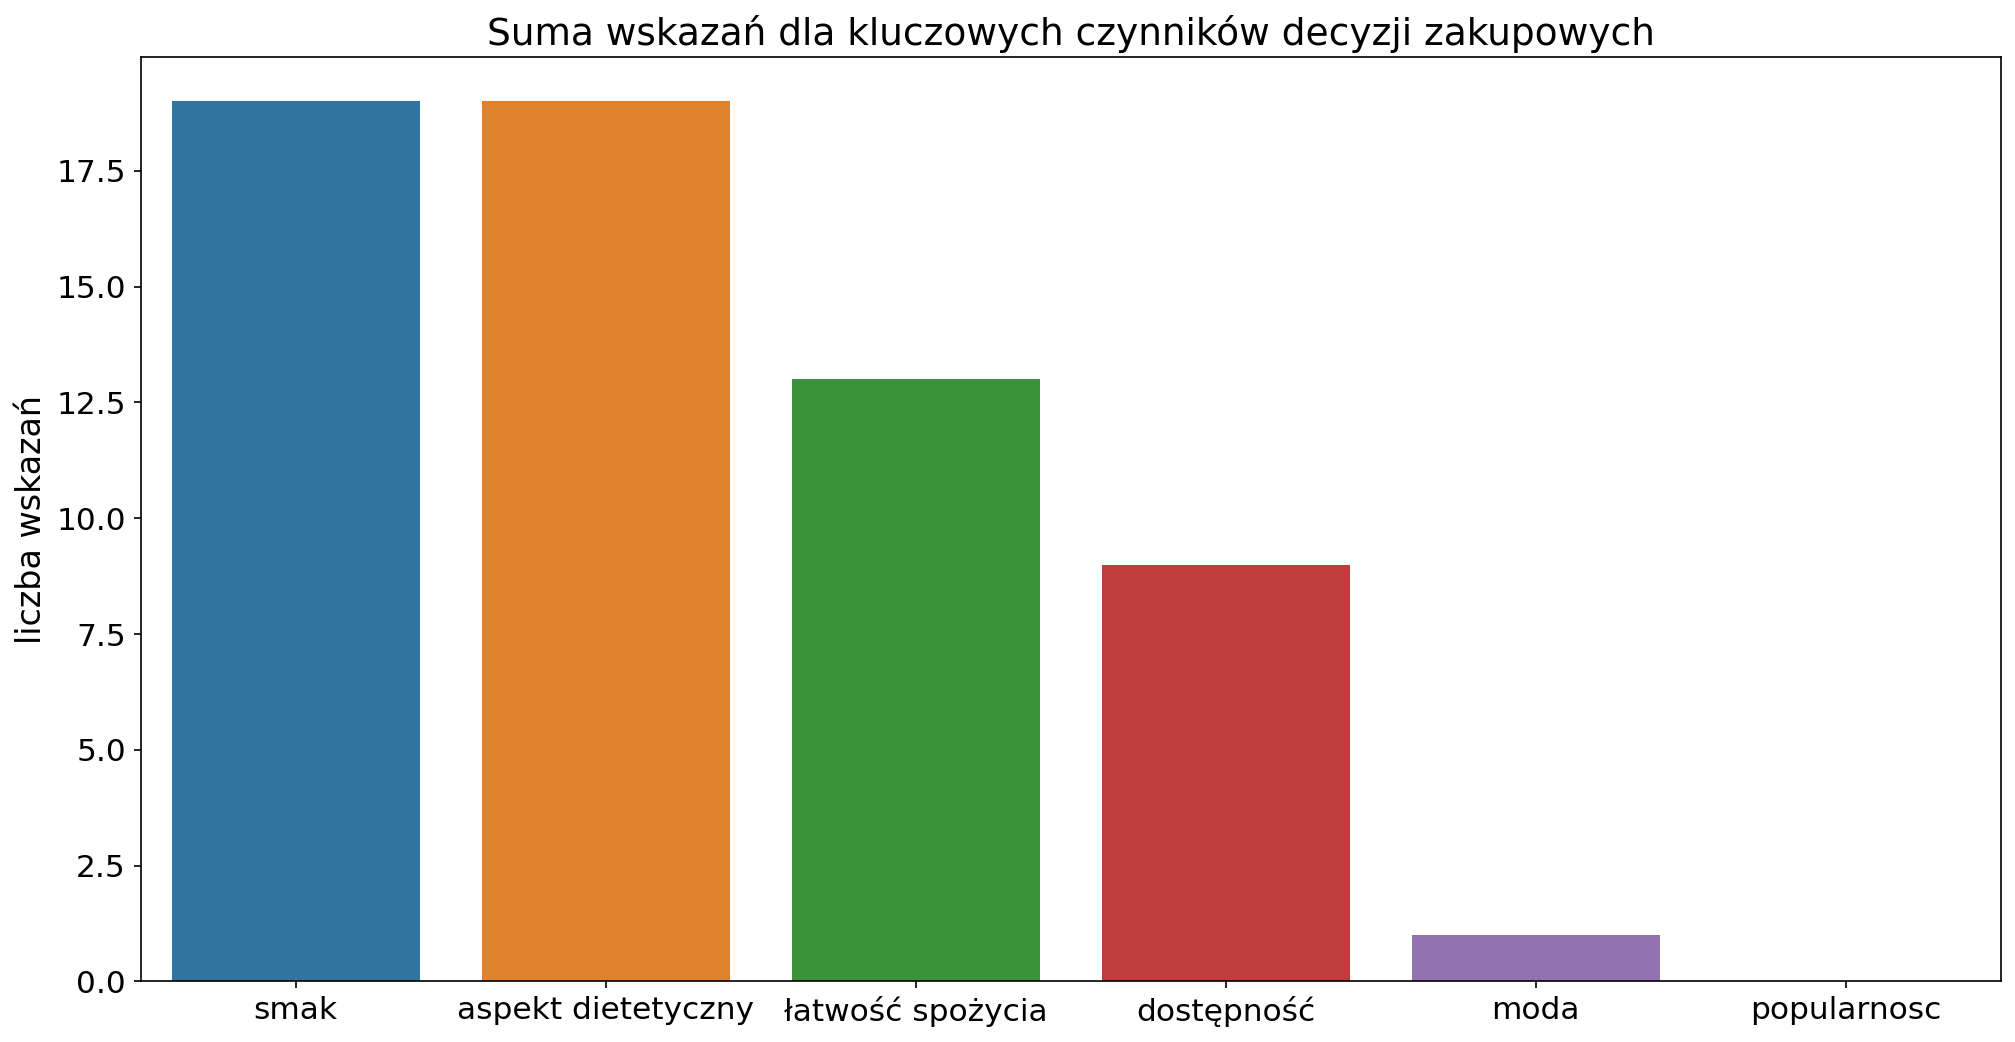

In [219]:
suma_wielokrotny = df.loc[:,'pyt_14_smak':'pyt_14_latwosc_spożycia'].sum().sort_values(ascending=False)
custom_labels = ['smak','aspekt dietetyczny','łatwość spożycia',
                 'dostępność','moda','popularnosc']
plt.figure(figsize=(16,8),dpi=150)
sns.barplot(x = suma_wielokrotny.index, y = suma_wielokrotny.values,
           hue = suma_wielokrotny.index)
plt.title('Suma wskazań dla kluczowych czynników decyzji zakupowych',
          fontsize=18)
plt.xlabel('')
plt.ylabel('liczba wskazań',
          fontsize=16)
plt.xticks(ticks=range(len(custom_labels)),labels=custom_labels,
          fontsize=15);
plt.yticks(fontsize=15)




<font size="6">**Pytania ilościowe 21-23**</font>

**Wartości makaroskładników dla przeciętnego jogurtu proteinowego:**\
KCAL: 64,2\
BIAŁKO: 8,2\
TŁUSZCZ: 1,2\
WĘGLOWODANY: 5,9


In [30]:
gender_map = {'Mężczyzna':0,
              'Kobieta':1}

In [31]:
numeric1 = df.loc[:,'pyt_21_bialko':'pyt_23_KCAL']
numeric2 = df.loc[:,'pyt_27_jakosc_diety':'pyt_28_ilosc_treningow']
numeric3 = df['pyt_26_plec'].replace(gender_map)

numeric_df = pd.concat([numeric1,numeric2,numeric3],axis=1)



<font size="6">**Miary statystyczne**</font>

In [165]:
stats_df = df[['pyt_21_bialko','pyt_21_tluszcz','pyt_21_wegle','pyt_22_cena', 'pyt_22_pojemnosc',
               'pyt_23_KCAL','pyt_28_ilosc_treningow','pyt_27_jakosc_diety']]

miary = {
    'Średnia': stats_df.mean(),
    'Mediana': stats_df.median(),
    'Dominanta': stats_df.mode().iloc[0],
    'Odchylenie standardowe': stats_df.std(),
    'Skośność': stats_df.skew(),
    'Współczynnik zmienności': stats_df.std() / stats_df.mean(),
    'Rozstęp': stats_df.max() - stats_df.min(),
    'Minimum': stats_df.min(),
    'Maksimum': stats_df.max(),
    'Suma': stats_df.sum(),
    'Percentyl 10': stats_df.quantile(0.1),
    'Percentyl 25': stats_df.quantile(0.25),
    'Percentyl 50': stats_df.quantile(0.5),
    'Percentyl 75': stats_df.quantile(0.75),
    'Percentyl 90': stats_df.quantile(0.9)
}
miary_df = pd.DataFrame(miary)
np.round(miary_df.transpose(),2)


,pyt_21_bialko,pyt_21_tluszcz,pyt_21_wegle,pyt_22_cena,pyt_22_pojemnosc,pyt_23_KCAL,pyt_28_ilosc_treningow,pyt_27_jakosc_diety
Średnia,20.03,3.92,15.60,5.78,307.67,249.07,2.57,3.47
Mediana,12.00,2.00,10.00,5.50,300.00,245.00,2.50,4.00
Dominanta,8.00,2.00,10.00,5.00,350.00,300.00,3.00,4.00
Odchylenie standardowe,19.43,4.09,13.43,1.95,94.53,98.61,1.74,1.11
Skośność,2.12,1.35,2.24,0.19,0.42,0.55,0.22,-0.57
Współczynnik zmienności,0.97,1.04,0.86,0.34,0.31,0.40,0.68,0.32
Rozstęp,77.00,15.00,61.00,8.00,350.00,450.00,6.00,4.00
Minimum,3.00,0.00,4.00,2.00,150.00,50.00,0.00,1.00
Maksimum,80.00,15.00,65.00,10.00,500.00,500.00,6.00,5.00
Suma,600.80,117.50,468.00,173.49,9230.00,7472.00,77.00,104.00


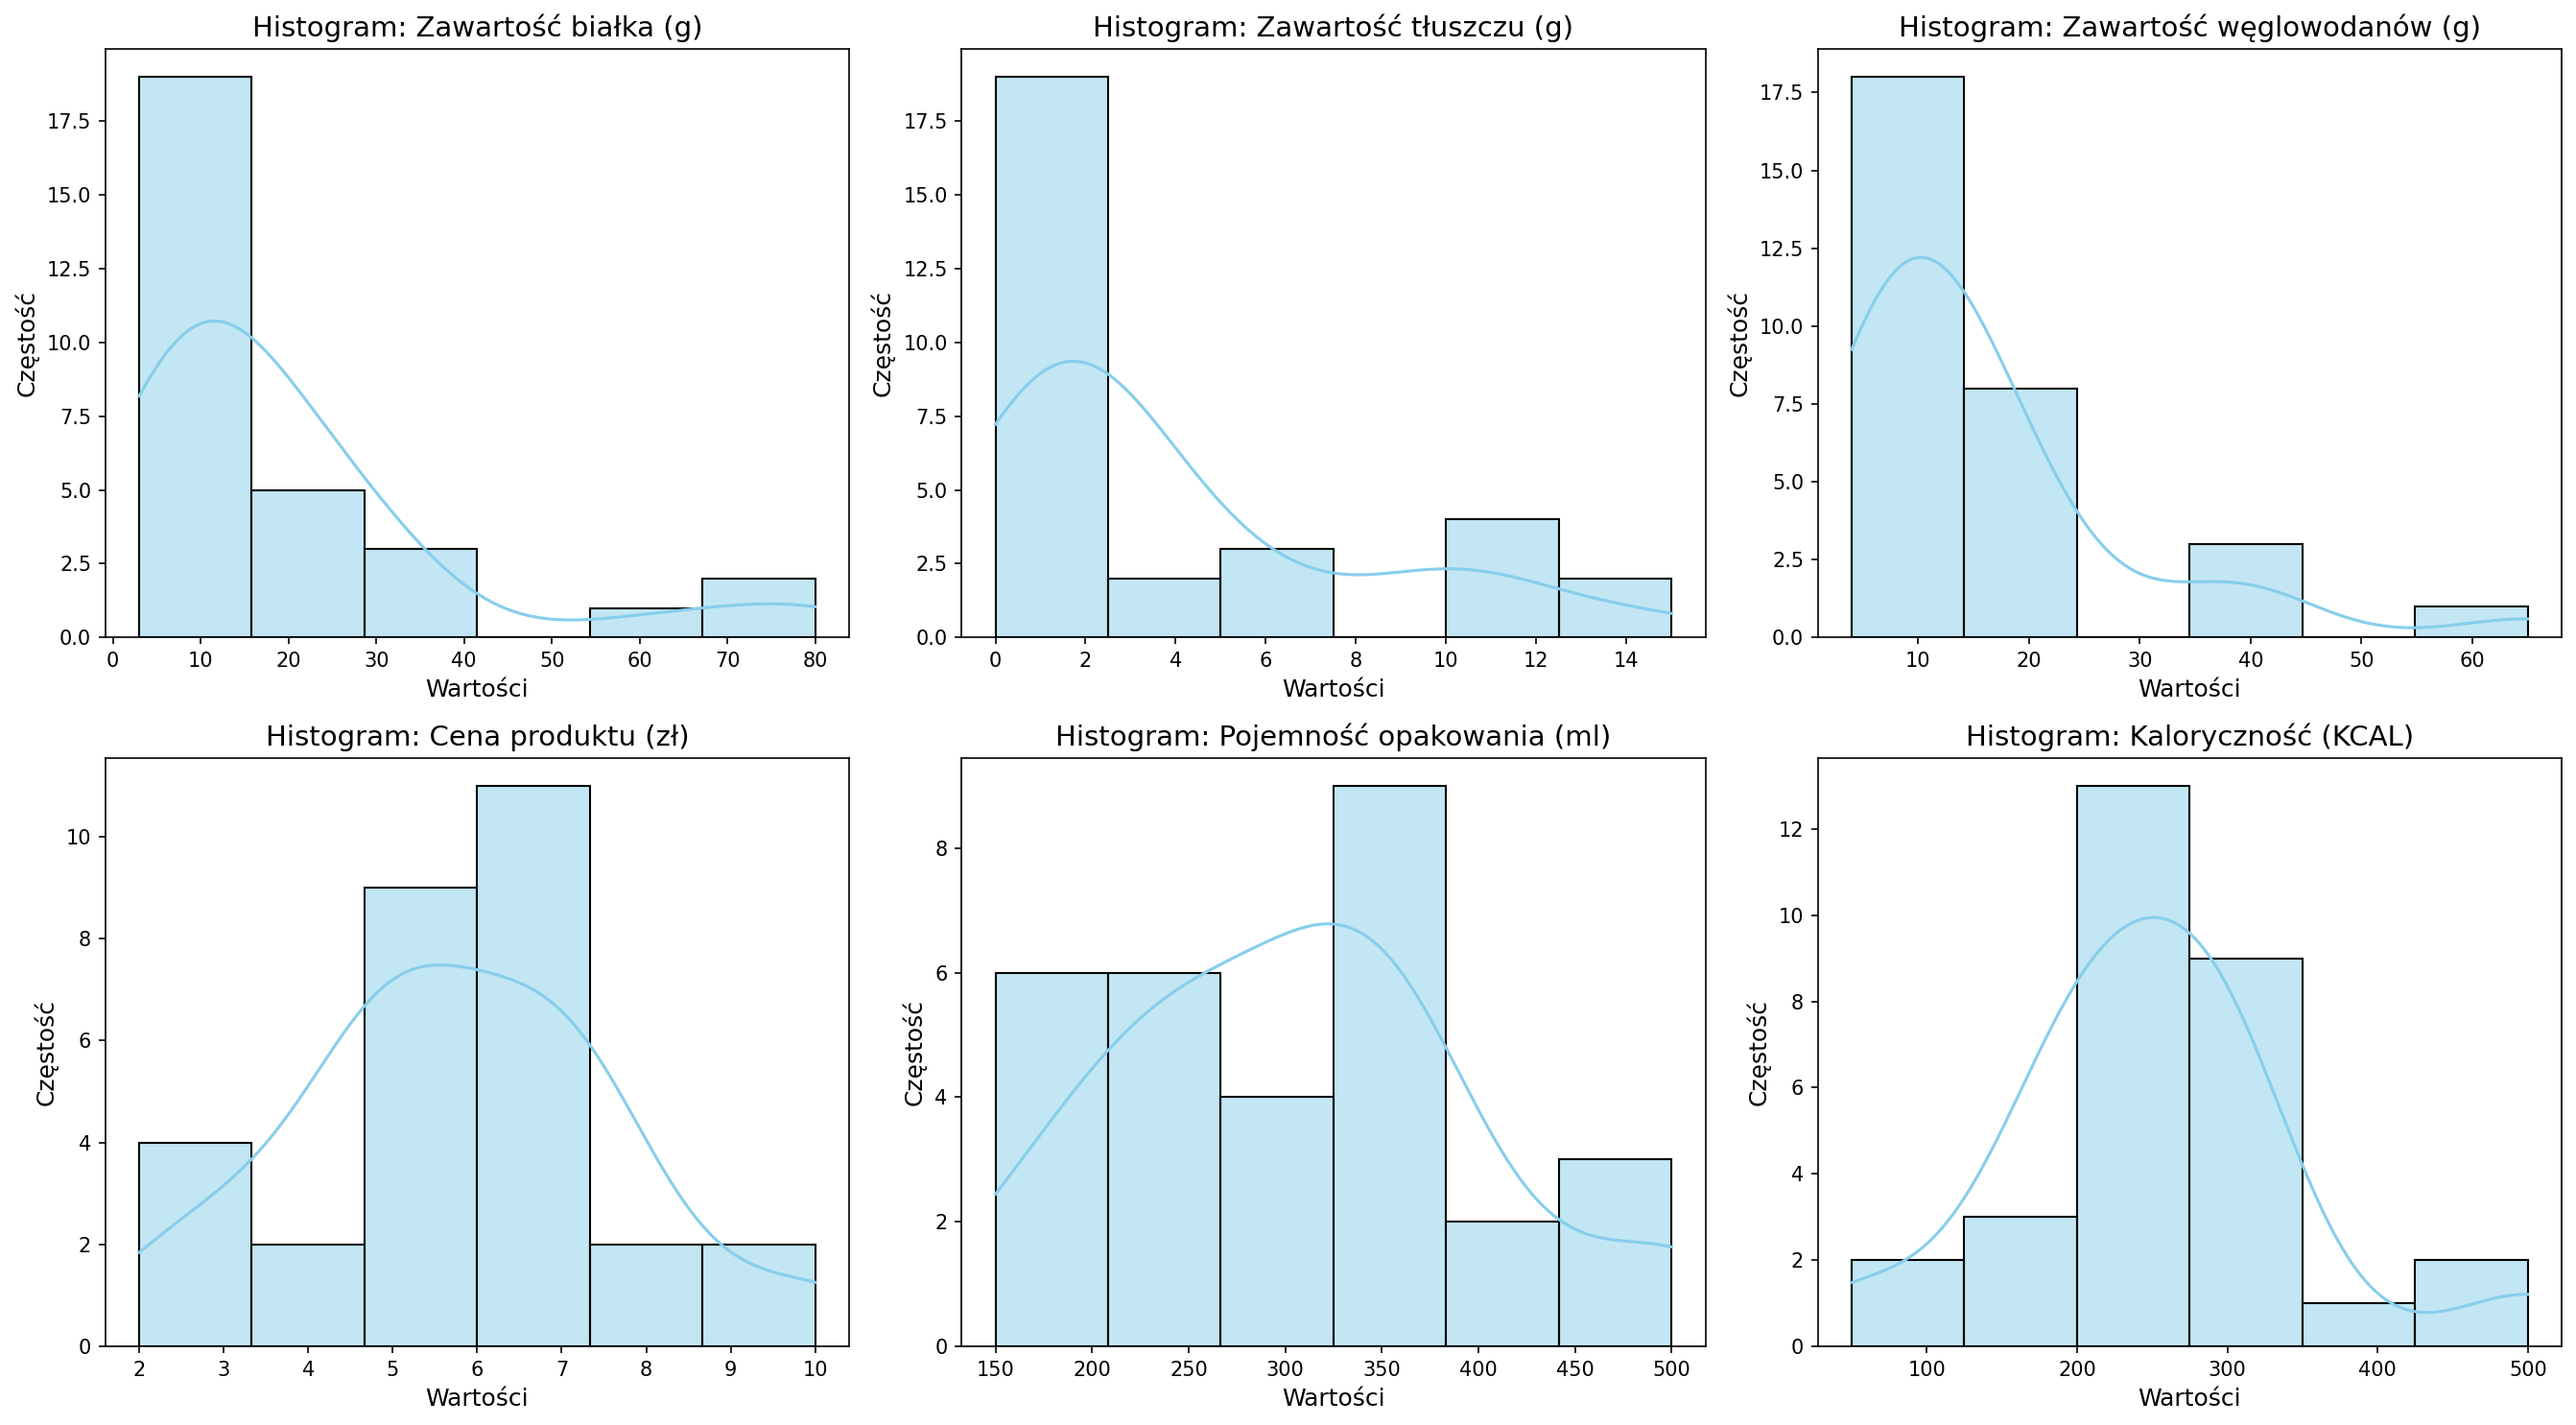

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


color = 'skyblue' 
fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=150)

sns.histplot(data=stats_df, x='pyt_21_bialko', kde=True, bins=6, color=color, ax=axes[0, 0])
axes[0, 0].set_title("Histogram: Zawartość białka (g)", fontsize=14)
axes[0, 0].set_xlabel('Wartości', fontsize=12)
axes[0, 0].set_ylabel('Częstość', fontsize=12)

sns.histplot(data=stats_df, x='pyt_21_tluszcz', kde=True, bins=6, color=color, ax=axes[0, 1])
axes[0, 1].set_title("Histogram: Zawartość tłuszczu (g)", fontsize=14)
axes[0, 1].set_xlabel('Wartości', fontsize=12)
axes[0, 1].set_ylabel('Częstość', fontsize=12)

sns.histplot(data=stats_df, x='pyt_21_wegle', kde=True, bins=6, color=color, ax=axes[0, 2])
axes[0, 2].set_title("Histogram: Zawartość węglowodanów (g)", fontsize=14)
axes[0, 2].set_xlabel('Wartości', fontsize=12)
axes[0, 2].set_ylabel('Częstość', fontsize=12)

sns.histplot(data=stats_df, x='pyt_22_cena', kde=True, bins=6, color=color, ax=axes[1, 0])
axes[1, 0].set_title("Histogram: Cena produktu (zł)", fontsize=14)
axes[1, 0].set_xlabel('Wartości', fontsize=12)
axes[1, 0].set_ylabel('Częstość', fontsize=12)

sns.histplot(data=stats_df, x='pyt_22_pojemnosc', kde=True, bins=6, color=color, ax=axes[1, 1])
axes[1, 1].set_title("Histogram: Pojemność opakowania (ml)", fontsize=14)
axes[1, 1].set_xlabel('Wartości', fontsize=12)
axes[1, 1].set_ylabel('Częstość', fontsize=12)

sns.histplot(data=stats_df, x='pyt_23_KCAL', kde=True, bins=6, color=color, ax=axes[1, 2])
axes[1, 2].set_title("Histogram: Kaloryczność (KCAL)", fontsize=14)
axes[1, 2].set_xlabel('Wartości', fontsize=12)
axes[1, 2].set_ylabel('Częstość', fontsize=12)

plt.tight_layout()

plt.savefig(r'D:\mszcz\Documents\Badenie marketing\hists.png',dpi=300)

<font size="6">**Korelacje**</font>

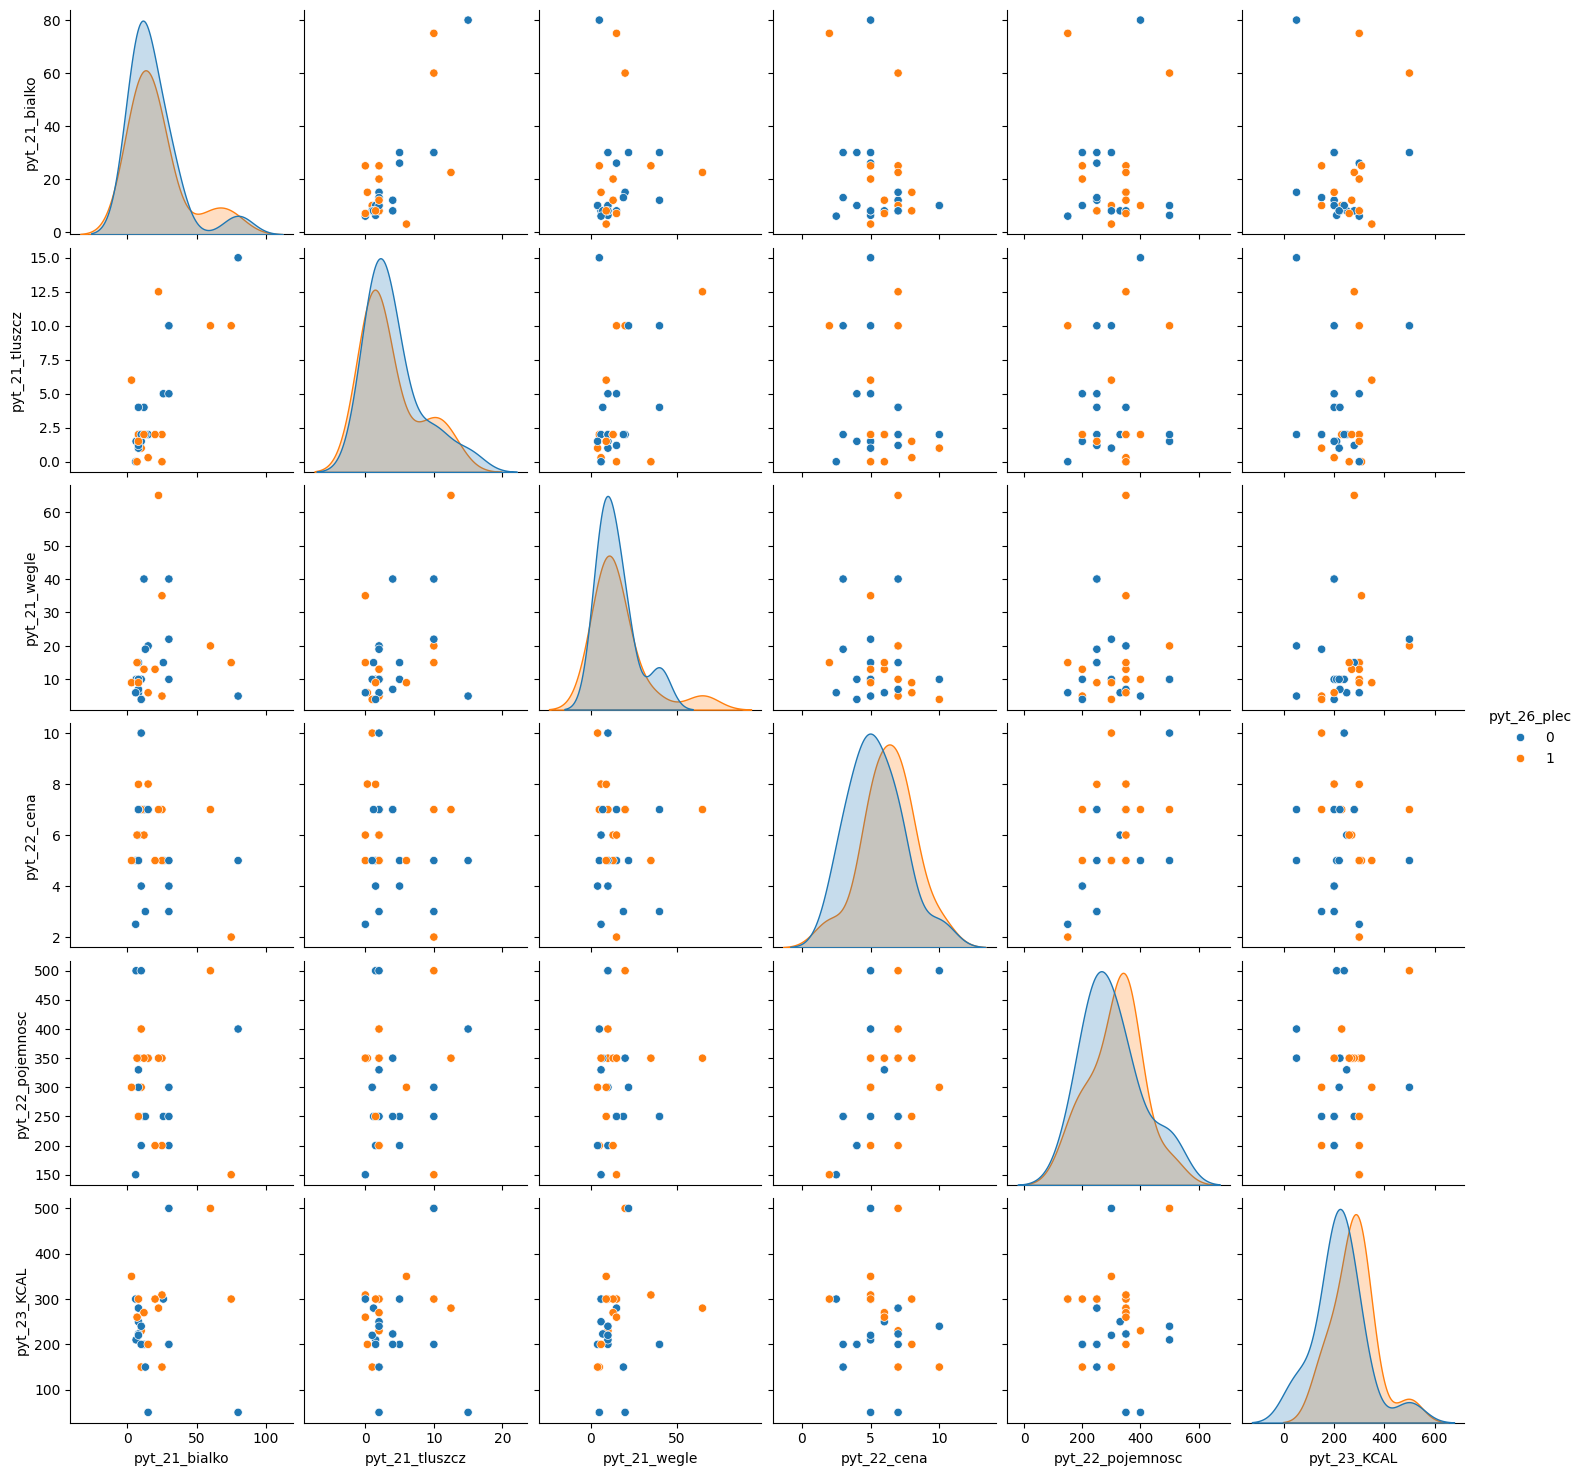

In [266]:
sns.pairplot(data=numeric_df.drop(['pyt_28_ilosc_treningow','pyt_27_jakosc_diety','cena_za_100ml'],axis=1),hue='pyt_26_plec')
plt.savefig(r'D:\mszcz\Documents\Badenie marketing\pairplot.png')

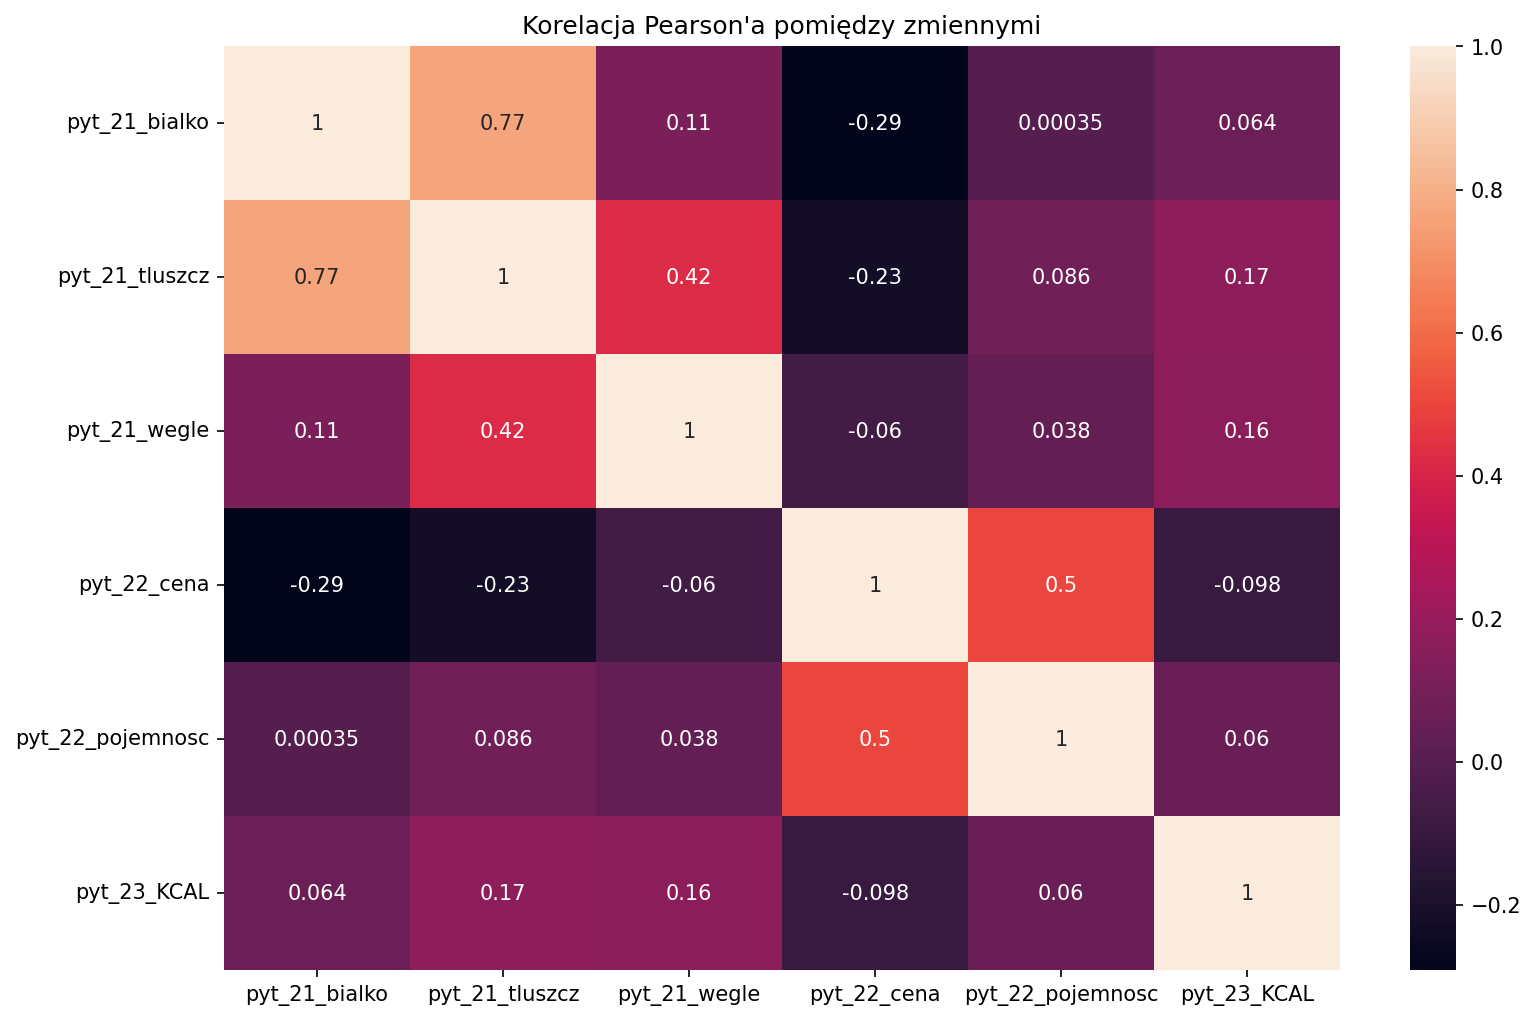

In [263]:
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(numeric_df.drop(['pyt_28_ilosc_treningow','pyt_27_jakosc_diety','pyt_26_plec','cena_za_100ml'],axis=1).corr(method='pearson'),annot=True)
plt.title("Korelacja Pearson'a pomiędzy zmiennymi")
plt.savefig(r'D:\mszcz\Documents\Badenie marketing\hitmap.png')

In [36]:
numeric_df.drop('pyt_26_plec',axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pyt_21_bialko,30.0,20.026667,19.431505,3.0,8.0,12.0,25.00,80.0
pyt_21_tluszcz,30.0,3.916733,4.090806,0.0,1.5,2.0,5.00,15.0
pyt_21_wegle,30.0,15.600000,13.433360,4.0,7.5,10.0,18.00,65.0
pyt_22_cena,30.0,5.783000,1.945795,2.0,5.0,5.5,7.00,10.0
pyt_22_pojemnosc,30.0,307.666667,94.529081,150.0,250.0,300.0,350.00,500.0
pyt_23_KCAL,30.0,249.066667,98.608223,50.0,200.0,245.0,300.00,500.0
pyt_27_jakosc_diety,30.0,3.466667,1.105888,1.0,3.0,4.0,4.00,5.0
pyt_28_ilosc_treningow,30.0,2.566667,1.735697,0.0,1.0,2.5,3.75,6.0


In [37]:
numeric_df['cena_za_100ml']=numeric_df['pyt_22_cena']/(df['pyt_22_pojemnosc']/100)

In [38]:
model_df = numeric_df.drop(['pyt_21_bialko','pyt_21_tluszcz','pyt_21_wegle','pyt_23_KCAL','cena_za_100ml'],axis=1)

y = numeric_df['pyt_22_cena']

X = numeric_df.drop(['pyt_21_bialko','pyt_21_tluszcz','pyt_21_wegle','pyt_23_KCAL','pyt_22_cena','cena_za_100ml'],axis=1)

In [39]:
X.corrwith(y)

pyt_22_pojemnosc          0.501568
pyt_27_jakosc_diety       0.064708
pyt_28_ilosc_treningow    0.114139
pyt_26_plec               0.245455
dtype: float64

<Axes: xlabel='pyt_22_pojemnosc', ylabel='pyt_22_cena'>

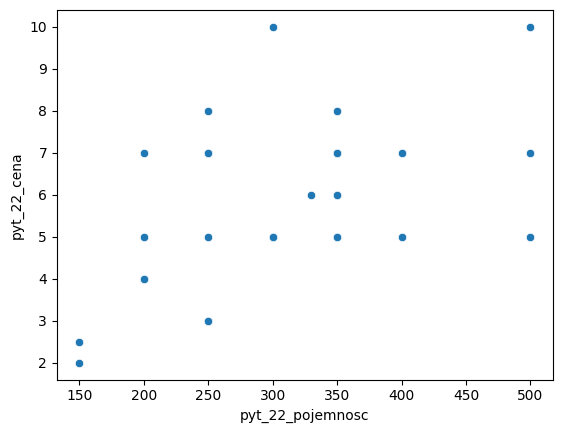

In [40]:
sns.scatterplot(data=numeric_df,y='pyt_22_cena',x='pyt_22_pojemnosc')

In [41]:
makro = {'KCAL':[249.05/3.5, 64.2],
         'Białko':[20.02,8.2],
         'Tłuszcz':[3.91,1.2],
         'WĘGLOWODANY':[15.6,5.9]}

In [42]:
makro_df = np.round(pd.DataFrame(data=makro,index=['Respondenci','Rzeczywistość']).transpose(),1)

Text(0.5, 1.0, 'Świadomość studentów o wartościach odżywczych jogurtów proteinowych')

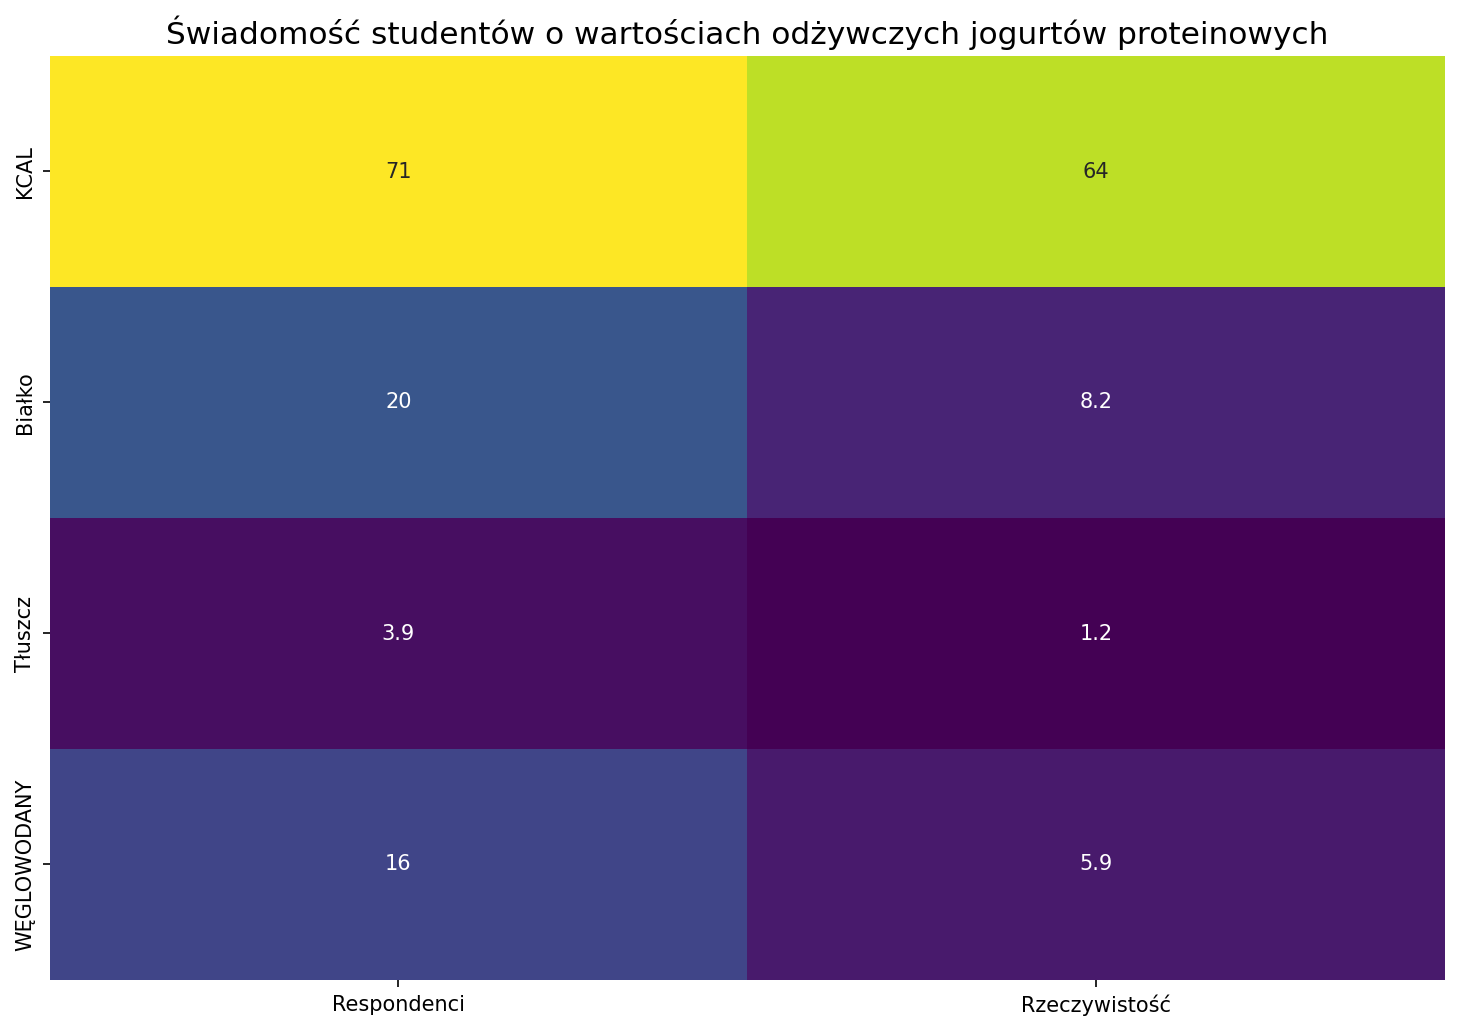

In [43]:
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(makro_df,annot=True,cmap='viridis',cbar=False)
plt.title('Świadomość studentów o wartościach odżywczych jogurtów proteinowych',
         fontsize=15)


<font size="8">**Tabele krzyżowe**</font>

<font size="5">**Tablica nr. 1.** badanie związku pomiędzy regularnością spożycia a miejscem zakupów</font>

In [268]:
tablica_1 = pd.crosstab(df['pyt_17_gdzie'],df['pyt_13_regularnosc'])

chi2,p,dof,expected = chi2_contingency(tablica_1)
N = tablica_1.values.sum()
C = np.sqrt(chi2 / (chi2 + N))

print("\nWyniki analizy:")
print(f"Statystyka chi-kwadrat: {chi2:.4f}")
print(f"Wartość p: {p:.4f}")
print(f"Stopnie swobody: {dof}")
print(f"Współczynnik kontyngencji: {C:.4f}")
tablica_1



Wyniki analizy:
Statystyka chi-kwadrat: 2.3254
Wartość p: 0.5077
Stopnie swobody: 3
Współczynnik kontyngencji: 0.2682


pyt_13_regularnosc,Nie,Tak
pyt_17_gdzie,,
"Dyskonty (np. Lidl, Biedronka)",9,16
"Hipermarkety (np. Auchan, Kaufland)",1,2
Małe sklepy spożywcze (np. Żabka),0,1
Stacje benzynowe,1,0


#### **Hipotezy:**
- **\( H0 \):** Zmienne są statystycznie niezależne.  
- **\( H1 \):** Zmienne są statystycznie zależne.  

**p-val > 0,05** --> nie ma podstaw do odrzucenia h0, co oznacza, **brak związku** pomiędzy regularnością spożyciaa miejscem zakupów

<font size="5">**Tablica nr. 2.** badanie związku pomiędzy celem dietetycznym a regularnością spożycia</font>

In [269]:
tablica_krzyzowa_13_29 = pd.crosstab(df['pyt_29_cel'],df['pyt_13_regularnosc'])

chi2,p,dof,expected = chi2_contingency(tablica_krzyzowa_13_29)
N = tablica_krzyzowa_13_29.values.sum()
C = (chi2/(chi2 + N))

print("\nWyniki analizy:")
print(f"Statystyka chi-kwadrat: {chi2:.4f}")
print(f"Wartość p: {p:.4f}")
print(f"Stopnie swobody: {dof}")
print(f"Współczynnik kontyngencji: {C:.4f}")
tablica_krzyzowa_13_29



Wyniki analizy:
Statystyka chi-kwadrat: 3.0007
Wartość p: 0.3915
Stopnie swobody: 3
Współczynnik kontyngencji: 0.0909


pyt_13_regularnosc,Nie,Tak
pyt_29_cel,,
Nie mam określonego celu związanego z moją dietą,4,3
Utrzymanie masy ciała,2,7
Zmniejszenie masy ciała,3,3
Zwiększenie masy ciała,2,6


#### **Hipotezy:**
- **\( H0 \):** Zmienne są statystycznie niezależne.  
- **\( H1 \):** Zmienne są statystycznie zależne.  

**p-val > 0,05** --> nie ma podstaw do odrzucenia h0, co oznacza, **brak związku** pomiędzy regularnością spożycia, a celem dietetycznym

<font size="5">**Tablica nr. 3.** badanie związku pomiędzy preferowanym smakiem a regularnością spożycia</font>

In [270]:
tablica_krzyzowa_11_13 = pd.crosstab(df['pyt_11_smak'],df['pyt_13_regularnosc'])

chi2,p,dof,expected = chi2_contingency(tablica_krzyzowa_13_29)
N = tablica_krzyzowa_11_13.values.sum()
C = (chi2/(chi2 + N))

print("\nWyniki analizy:")
print(f"Statystyka chi-kwadrat: {chi2:.4f}")
print(f"Wartość p: {p:.4f}")
print(f"Stopnie swobody: {dof}")
print(f"Współczynnik kontyngencji: {C:.4f}")
tablica_krzyzowa_11_13



Wyniki analizy:
Statystyka chi-kwadrat: 3.0007
Wartość p: 0.3915
Stopnie swobody: 3
Współczynnik kontyngencji: 0.0909


pyt_13_regularnosc,Nie,Tak
pyt_11_smak,,
Czekoladowy,2,3
Naturalny,2,1
Owocowy,4,10
Waniliowy,3,5


#### **Hipotezy:**
- **\( H0 \):** Zmienne są statystycznie niezależne.  
- **\( H1 \):** Zmienne są statystycznie zależne.  

**p-val > 0,05** --> nie ma podstaw do odrzucenia h0, co oznacza, **brak związku** pomiędzy preferowanym smakiem, a regularnością spożycia

<font size="8">**Analiza skupień**</font>

In [271]:
cluster_data = df.loc[:,'preferencja_Pilos':'cena_Mlekovita']

In [272]:
linked = linkage(cluster_data,method='ward')

Text(0, 0.5, 'Odległość')

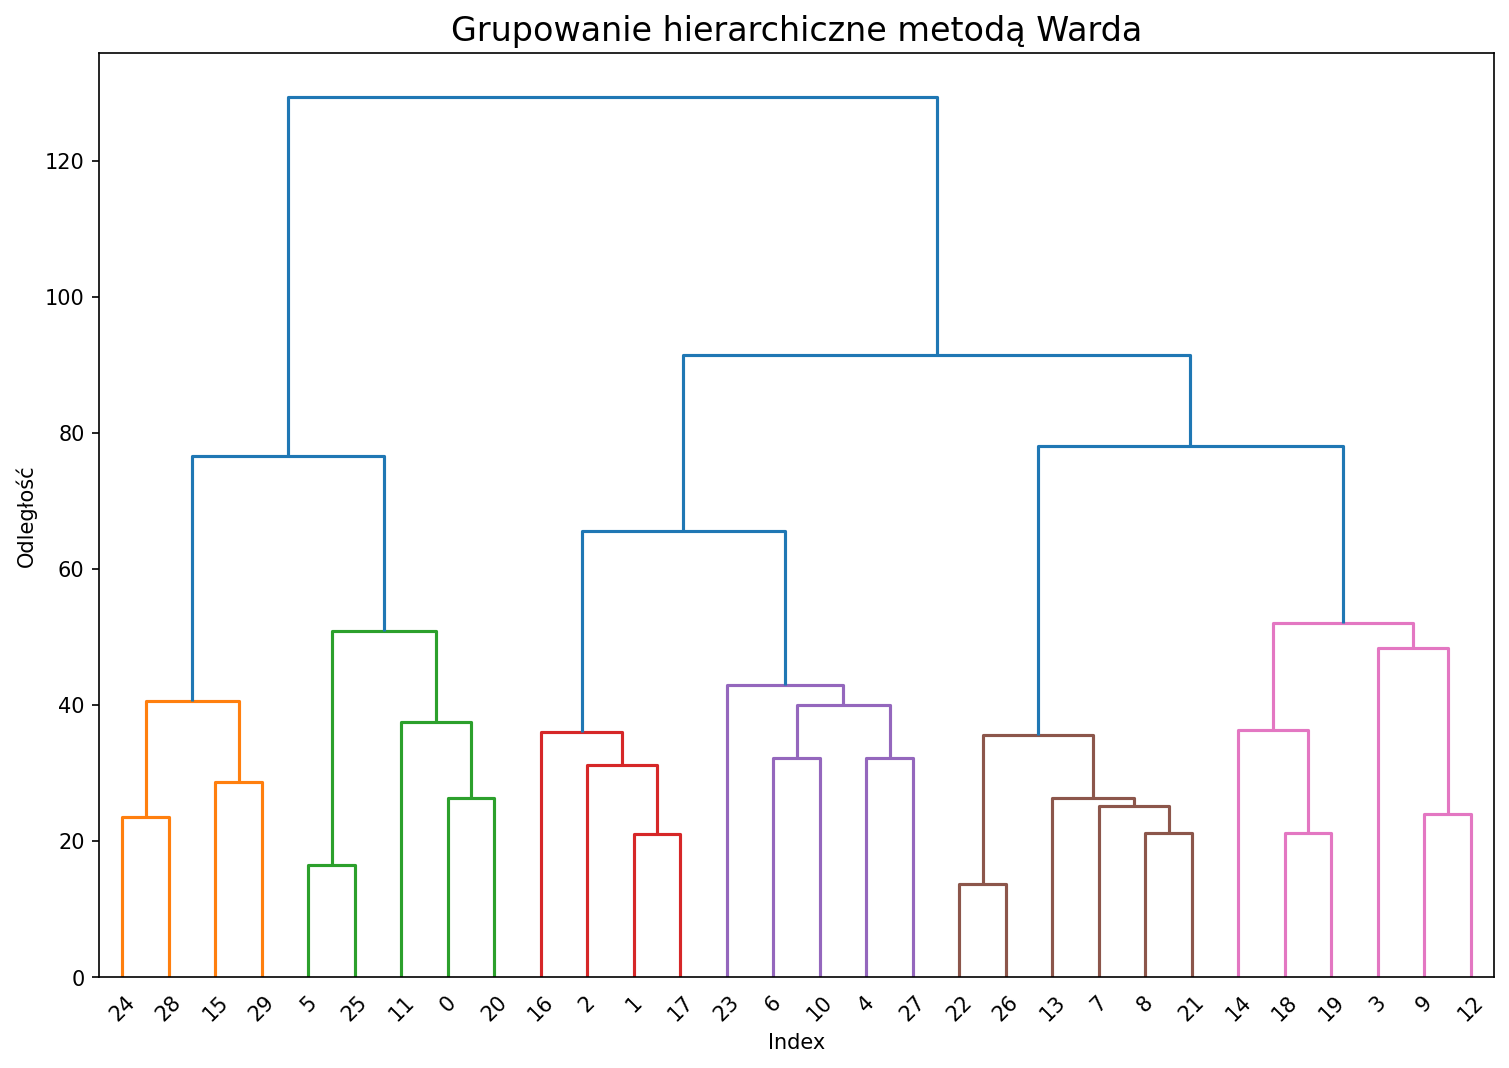

In [273]:
plt.figure(figsize=(12, 8),dpi=150)
dendrogram(linked,color_threshold=60)  
plt.title("Grupowanie hierarchiczne metodą Warda",fontsize=16)
plt.xlabel("Index")
plt.ylabel("Odległość")



In [274]:
df['Segment']=fcluster(linked,t=60,criterion='distance')

In [275]:
df['cena_za_100ml']=df['pyt_22_cena']/(df['pyt_22_pojemnosc']/100)

In [276]:
def dominanta(series):
    modes = series.mode()
    return modes.tolist() if not modes.empty else None

In [281]:
segmentacja=df.groupby(by='Segment').agg({
    'pyt_11_smak':dominanta,
    'pyt_12_pojemnosc':dominanta,
    'pyt_13_regularnosc':dominanta,
    'pyt_15_aspekt_dietetyczny':dominanta,
    'pyt_16_pora':dominanta,
    'pyt_17_gdzie':dominanta,
    'pyt_18_opakowanie':dominanta,
    'pyt_28_ilosc_treningow':'mean',
    'pyt_27_jakosc_diety':'mean',
    'pyt_29_cel':dominanta,
    'pyt_19_smak':'mean',
    'pyt_19_cena':'mean',
    'pyt_19_dostepnosc':'mean',
    'pyt_19_pojemnosc':'mean',
    'pyt_19_skład':'mean',
    'pyt_19_opakowanie':'mean',
    'pyt_19_wygoda':'mean',
    'pyt_19_wartosci':'mean',
    'pyt_23_KCAL':'mean',
    'pyt_21_bialko':'mean',
    'pyt_21_tluszcz': 'mean',
    'pyt_21_wegle':'mean',
    'cena_za_100ml':'mean',
    'pyt_26_plec':dominanta
}).transpose().round(2)

In [282]:
liczebnosc_segmentu = df.groupby(by='Segment').size()
udzial_w_rynku = liczebnosc_segmentu/len(df)
dane_seg=pd.DataFrame([liczebnosc_segmentu.to_dict(),round(udzial_w_rynku*100,2)],
            index=['liczebnosc_segmentu','udzial_w_rynku w %'])

segmentacja = pd.concat([dane_seg,segmentacja],axis=0)

In [283]:
segmentacja

,1,2,3,4,5,6
liczebnosc_segmentu,4.0,5.0,4.0,5.0,6.0,6.0
udzial_w_rynku w %,13.33,16.67,13.33,16.67,20.0,20.0
pyt_11_smak,[Owocowy],"[Owocowy, Waniliowy]",[Owocowy],[Waniliowy],[Owocowy],[Owocowy]
pyt_12_pojemnosc,[350 g],[350 g],[250 g],"[250 g, 350 g]","[250 g, 350 g, 500 g]",[350 g]
pyt_13_regularnosc,[Tak],[Tak],[Nie],[Tak],"[Nie, Tak]",[Tak]
pyt_15_aspekt_dietetyczny,[Zawartość białka],[Zawartość białka],[Zawartość białka],[Zawartość białka],[Zawartość białka],[Zawartość białka]
pyt_16_pora,[Jako osobny posiłek/przekąska],"[Jako składnik posiłku (np. z musli, owocami, ...","[Jako dodatek do posiłku, Jako osobny posiłek/...",[Jako osobny posiłek/przekąska],"[Jako składnik posiłku (np. z musli, owocami, ...",[Jako osobny posiłek/przekąska]
pyt_17_gdzie,"[Dyskonty (np. Lidl, Biedronka)]","[Dyskonty (np. Lidl, Biedronka)]","[Dyskonty (np. Lidl, Biedronka)]","[Dyskonty (np. Lidl, Biedronka)]","[Dyskonty (np. Lidl, Biedronka)]","[Dyskonty (np. Lidl, Biedronka)]"
pyt_18_opakowanie,[Plastikowe butelki],[Plastikowe butelki],"[Papierowe/Kartonowe butelki, Plastikowe butelki]",[Plastikowe butelki],[Plastikowe butelki],[Plastikowe butelki]
pyt_28_ilosc_treningow,4.0,1.8,2.0,2.2,2.166667,3.333333


<font size="8">Pyt 23. Likert</font>

In [220]:
response_map = {
    'Zdecydowanie się nie zgadzam': 1,
    'Nie zgadzam się': 2,
    'Raczej się nie zgadzam': 3,
    'Niezdecydowany': 4,
    'Raczej się zgadzam': 5,
    'Zgadzam się': 6,
    'Zdecydowanie się zgadzam': 7}

In [224]:
likert_numeric = df.loc[:,'pyt_24_1':'pyt_24_7'].replace(response_map)

In [227]:
likert_numeric2 = likert_numeric
likert_numeric2['plec']=df['pyt_26_plec']
likert_numeric2.groupby('plec').median()

,pyt_24_1,pyt_24_2,pyt_24_3,pyt_24_4,pyt_24_5,pyt_24_6,pyt_24_7
plec,,,,,,,
Kobieta,5.0,5.0,5.0,6.0,4.0,4.5,4.0
Mężczyzna,5.0,4.5,5.0,5.0,4.5,5.0,4.0


In [222]:
likert_numeric.median()

pyt_24_1    5.0
pyt_24_2    5.0
pyt_24_3    5.0
pyt_24_4    6.0
pyt_24_5    4.0
pyt_24_6    5.0
pyt_24_7    4.0
dtype: object

In [236]:
likert_numeric2

,pyt_24_1,pyt_24_2,pyt_24_3,pyt_24_4,pyt_24_5,pyt_24_6,pyt_24_7,plec
0,5,3,4,7,6,7,4,Mężczyzna
1,2,5,6,5,3,5,5,Mężczyzna
2,4,5,3,6,5,3,1,Mężczyzna
3,5,7,6,6,5,7,6,Kobieta
4,3,3,5,6,6,5,2,Mężczyzna
5,5,6,6,5,3,4,5,Kobieta
6,4,5,3,4,4,5,6,Mężczyzna
7,3,5,6,7,3,7,4,Kobieta
8,3,4,4,5,5,3,2,Mężczyzna
9,5,7,7,5,1,3,4,Mężczyzna


In [228]:
data = [go.Box(y=likert_numeric[question], name=question) for question in likert_numeric.columns
        if question.startswith('pyt_2')]
layout = go.Layout(title='pytania Likertowskie',
                  font=dict(size=18))

fig = go.Figure(data=data,layout=layout)
pyo.plot(fig)

'temp-plot.html'

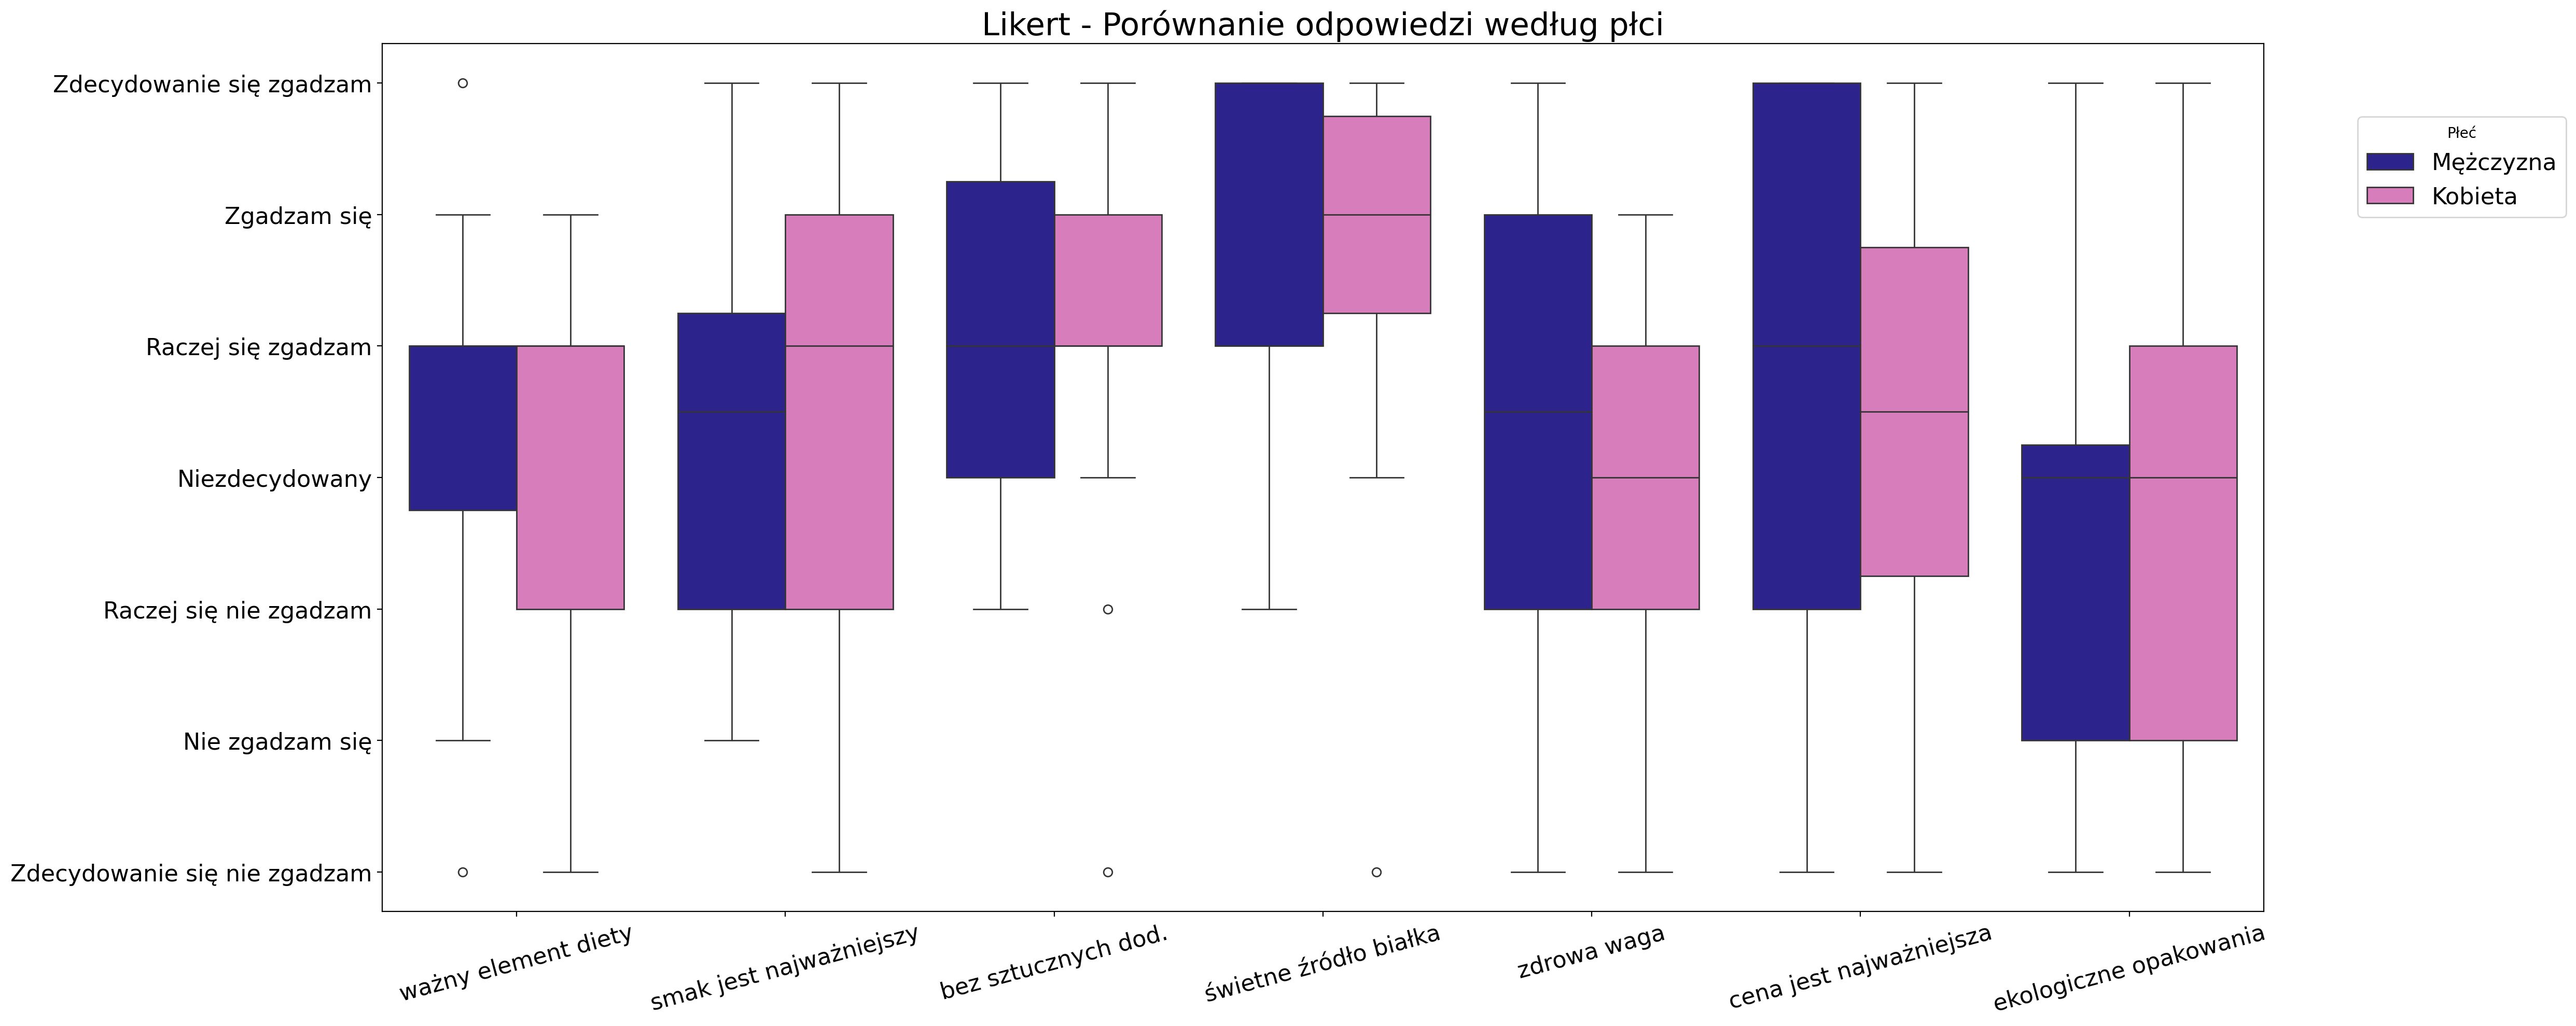

In [245]:
df_melted = likert_numeric2.melt(id_vars=['plec'], 
                                 var_name='Pytanie', 
                                 value_name='Ocena')


custom_palette = {'Kobieta': '#e66ec2', 'Mężczyzna': '#1d119e'}

custom_tick_labels = [
    'ważny element diety', 'smak jest najważniejszy', 'bez sztucznych dod.',
    'świetne źródło białka', 'zdrowa waga', 'cena jest najważniejsza',
    'ekologiczne opakowania'
]

y_labels = [
    'Zdecydowanie się nie zgadzam', 'Nie zgadzam się', 'Raczej się nie zgadzam',
    'Niezdecydowany', 'Raczej się zgadzam', 'Zgadzam się', 'Zdecydowanie się zgadzam'
]

plt.figure(figsize=(25, 10), dpi=200)
sns.boxplot(data=df_melted, x='Pytanie', y='Ocena', hue='plec', palette=custom_palette)

plt.title('Likert - Porównanie odpowiedzi według płci', fontsize=22)
plt.xlabel('')
plt.ylabel('')

plt.legend(title='Płeć', fontsize=16, loc=(1.05, 0.8))
plt.xticks(fontsize=16, ticks=range(len(custom_tick_labels)), labels=custom_tick_labels, rotation=15)
plt.yticks(fontsize=16, ticks=range(1, 8), labels=y_labels)
plt.tight_layout()
plt.savefig(r'D:\mszcz\Documents\Badenie marketing\Likert.png')

<font size="8">**Osgood**</font>

In [246]:
osgood_resp = df.loc[:,'pyt_25_1':'pyt_25_7']
osgood_mean=osgood_resp.mean().sort_values(ascending=False)

In [255]:
osgood_resp['plec']=df['pyt_26_plec']
np.round(osgood_resp.groupby('plec').mean())

,pyt_25_1,pyt_25_2,pyt_25_3,pyt_25_4,pyt_25_5,pyt_25_6,pyt_25_7
plec,,,,,,,
Kobieta,5.0,4.0,2.0,4.0,2.0,4.0,4.0
Mężczyzna,4.0,3.0,2.0,4.0,3.0,4.0,4.0


In [257]:
np.round(osgood_mean)

pyt_25_1    4.0
pyt_25_7    4.0
pyt_25_6    4.0
pyt_25_4    4.0
pyt_25_2    3.0
pyt_25_5    3.0
pyt_25_3    2.0
dtype: float64

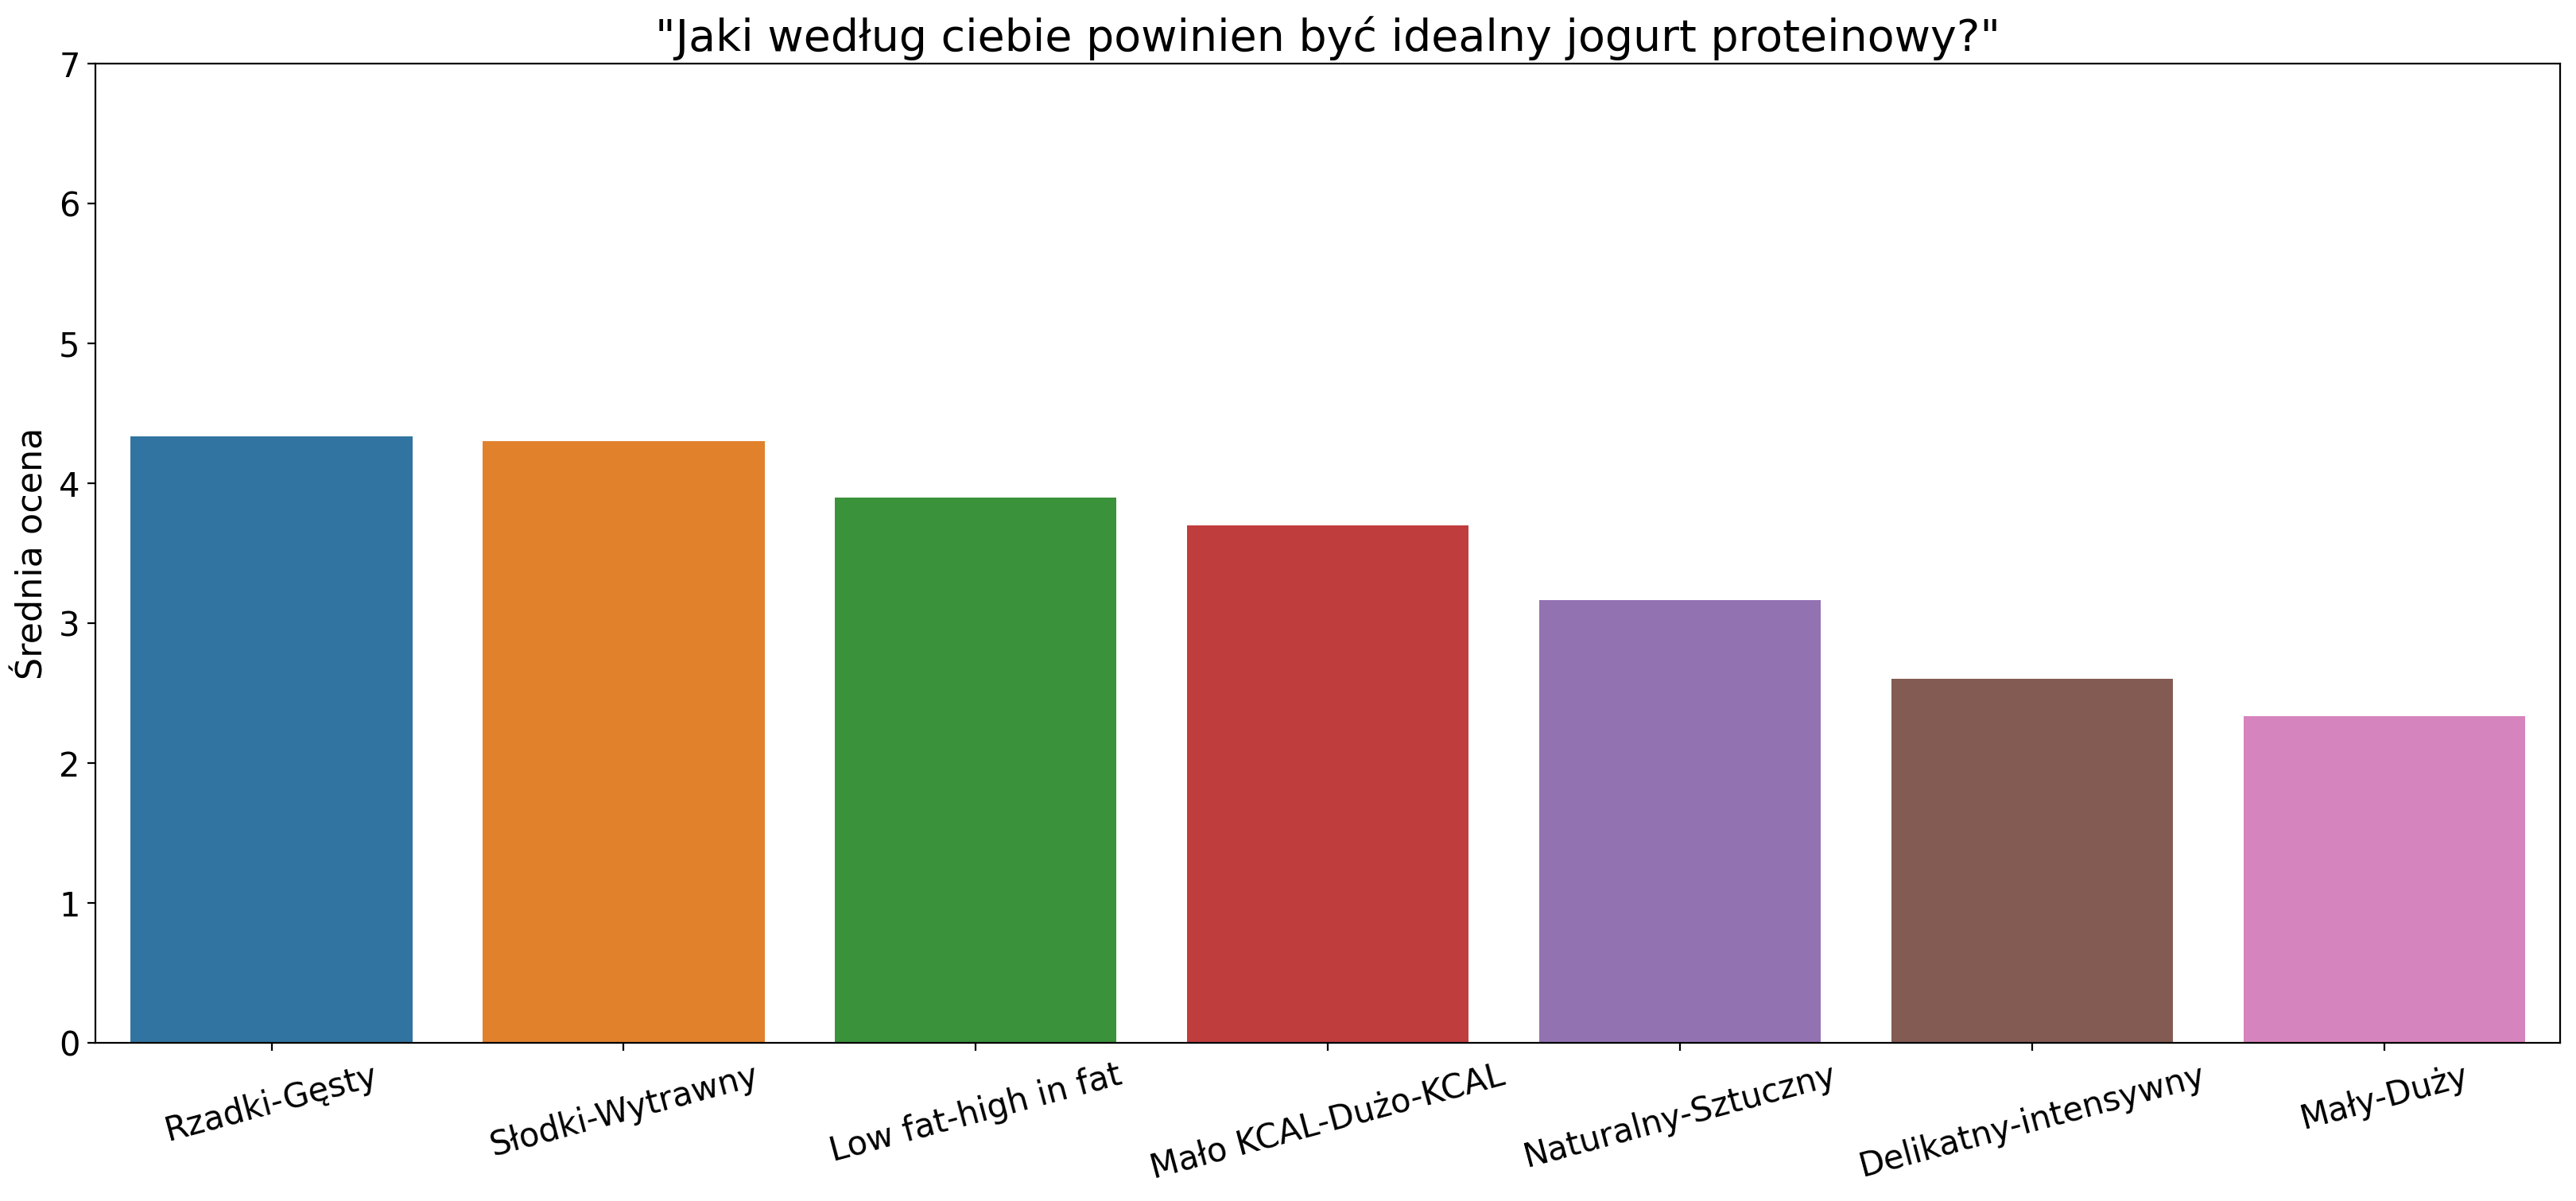

In [261]:
plt.figure(figsize=(20,8),dpi=200)
custom_ticks = ['Rzadki-Gęsty','Słodki-Wytrawny','Low fat-high in fat',
                'Mało KCAL-Dużo-KCAL','Naturalny-Sztuczny','Delikatny-intensywny','Mały-Duży'
                ]
sns.barplot(x=osgood_mean.index,y=osgood_mean.values,
           hue=osgood_mean.index)
plt.title('"Jaki według ciebie powinien być idealny jogurt proteinowy?"',
         fontsize=20)
plt.xlabel('')
plt.ylabel('Średnia ocena',
          fontsize=16)
plt.xticks(ticks=range(len(custom_ticks)),labels=custom_ticks,
          fontsize=15,rotation=15)
plt.yticks(fontsize=15)
plt.ylim(0,7)
